In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib qt
%matplotlib inline

simulation_L = 125

In [2]:
# method to get all halo values
def get_values(index, minmass=0):
    # mask values
    mask = np.logical_and((name==index), (m>minmass))
    mvir, rvir, x, y, z = m[mask], r[mask], x_pos[mask], y_pos[mask], z_pos[mask]
    
    mask_x = (x-x[0]>2*rvir[0])
    #print(mask_x)
    x[mask_x]=x[mask_x]-simulation_L
    
    mask_x_case2 = (x[0]-x>2*rvir[0])
    x[mask_x_case2] = simulation_L+x[mask_x_case2]
    
    mask_z = (z-z[0]>2*rvir[0])
    z[mask_z]=z[mask_z]-simulation_L
    
    mask_z_case2 = (z[0]-z>2*rvir[0])
    z[mask_z_case2] = simulation_L+z[mask_z_case2]
    
    mask_y = (y-y[0]>2*rvir[0])
    y[mask_y]=y[mask_y]-simulation_L
    
    mask_y_case2 = (y[0]-y>2*rvir[0])
    y[mask_y_case2] = simulation_L+y[mask_y_case2]
    
    return mvir, rvir, x, y, z

In [3]:
# method to calculate ellipsoid axes
def get_axes(x, y, z, nonzerocenter = True):
    # define coordinates relative to center halo
    #print(x,y,z)
    
    if nonzerocenter:
        x = x-x[0]
        y = y-y[0]
        z = z-z[0]
    
        x = x[1:]
        y = y[1:]
        z = z[1:]
    
    # setup
    M = np.zeros((3,3))
    # print(M)
    
    # calculate elements of tensor
    M[0][0] = np.sum(y**2 + z**2)
    M[1][1] = np.sum(z**2 + x**2)
    M[2][2] = np.sum(x**2 + y**2)
    M[0][1] = M[1][0] = -np.sum(x*y)
    M[0][2] = M[2][0] = -np.sum(x*z)
    M[1][2] = M[2][1] = -np.sum(y*z)
    
    # get eigenvalues + moments of inertia
    eigenvalues, eigenvectors = np.linalg.eig(M)
    I_a = eigenvalues[0] * 5 / x.shape[0]
    I_b = eigenvalues[1] * 5 / x.shape[0]
    I_c = eigenvalues[2] * 5 / x.shape[0]
    
    # calculate axes
    axes = np.zeros(3)
    axes[1] = np.sqrt((I_a - I_b + I_c)/2)
    axes[2] = np.sqrt(I_a - (axes[1]**2))
    axes[0] = np.sqrt(I_c - (axes[1]**2))
    
    #if np.isnan(np.sum(axes)):
        #print(axes)
    
    ordered_axes = np.sort(axes)
    ordered_axes = ordered_axes[::-1]
    
    
    return ordered_axes

In [6]:
# load in Chinchilla data
name, m, r, x_pos, y_pos, z_pos = np.loadtxt("../Chinchilla_L125_e1.dat",usecols=(0,3,4,8,9,10)).T
mvir, rvir, x, y, z = get_values(275633)
# print(rvir[0])
get_axes(x,y,z)

array([0.95779869, 0.79553558, 0.71030045])

In [7]:
def plot_3d(values):
    rvir, x, y, z = values[0], values[1], values[2], values[3]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[1:], y[1:], z[1:], zdir='z', s=rvir[1:]*1000, c='r', alpha=0.9)
    ax.scatter(x[0], y[0], z[0], zdir='z', s=rvir[0]*1000, c='k', alpha=0.9)

In [8]:
def get_halo_lists(filename):
    halos = np.loadtxt(filename,usecols=(0,1,2,6,7,8))
    indices = np.unique(halos[:, 0],return_index=True)
    return halos[indices[1]]

In [9]:
%matplotlib qt
plot_3d(get_values(46116)[1:])

In [17]:
plot_3d(get_values(580979)[1:])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
 
def random_sphere(N):
    """ random_sphere returns the azimuthal angle, phi, and polar angle, theta
    of N points generated uniformly at random over the surface of a sphere.
    """
    # See https://mathworld.wolfram.com/SpherePointPicking.html for the
    # algorithm. (Basically just the Inverse Transfer Method.)
    phi = 2*np.pi*random.random(N)
    theta = np.arccos(2*random.random(N) - 1)
    return phi, theta
 
def spherical_to_cartesian(phi, theta, r):
    """ spherical_to_cartesian converts spherical coordiantes to cartesian
    coordinates. Here, phi is the azimuthal angle, theta is the polar angle, and
    r is the radius.
    """
    # See https://mathworld.wolfram.com/SphericalCoordinates.html, but note the
    # difference in convention.
    x = r*np.cos(phi)*np.sin(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = r*np.cos(theta)
    return x, y, z
 
def random_ball(N, R):
    """ random_ball returns a N points (x, y, z) generated uniformly at
    random from within a ball of radius r.
    """
    phi, theta = random_sphere(N)
    # Inverse Transform Method, See
    # http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-ITM.pdf
    r = random.random(N)**(1.0/3) * R
    return spherical_to_cartesian(phi, theta, r)
    
def random_ellipsoid(N, a, b, c):
    """ random_ellipsoid returns N points generated uniformly at random inside
    an ellipsoid. The axes of the ellipsoid are given by (a, b, c) which
    are aligned with the x, y, and z axes, respectively.
    """
    x, y, z = random_ball(N, 1.0)
    x[0] = 0
    y[0] = 0
    z[0] = 0
    return x*a, y*b, z*c

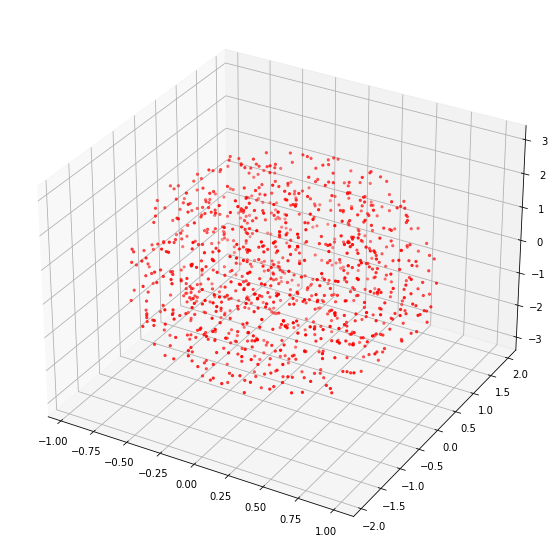

In [59]:
#%matplotlib qt
x,y,z = random_ellipsoid(1000,1,2,3)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0:], y[0:], z[0:], zdir='z', s=5, c='r')

(array([ 304.,  772., 1081., 1325., 1463., 1461., 1306., 1173.,  810.,
         305.]),
 array([-9.88498600e-01, -7.90945197e-01, -5.93391794e-01, -3.95838392e-01,
        -1.98284989e-01, -7.31586570e-04,  1.96821816e-01,  3.94375219e-01,
         5.91928621e-01,  7.89482024e-01,  9.87035427e-01]),
 <BarContainer object of 10 artists>)

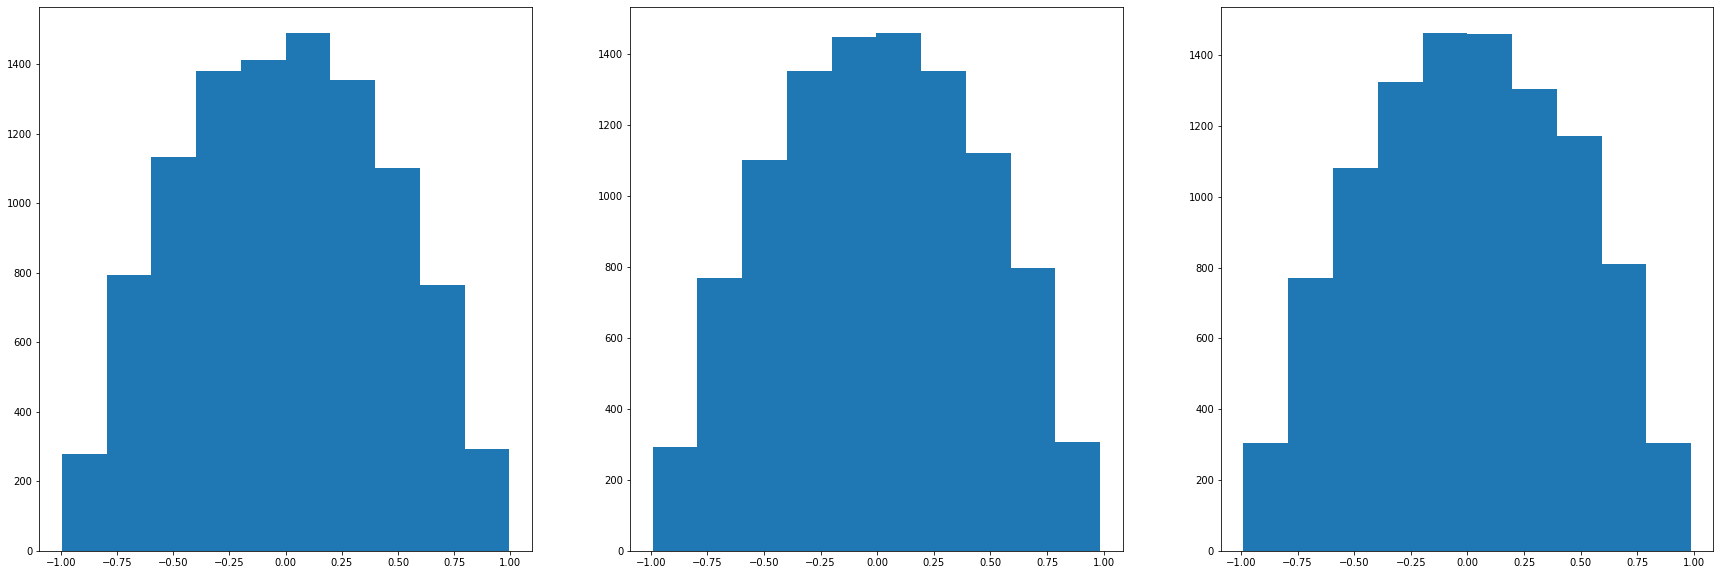

In [12]:
%matplotlib inline

# histogram of x, y, z coordinates from random ellipsoid
x,y,z = random_ellipsoid(10000,1,1,1)
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(x,bins=10)
ax[1].hist(y, bins=10)
ax[2].hist(z, bins=10)

In [59]:
print(x[:10])
print(y[:10])

[ 0.51948109  0.33311086  0.61352958  0.31875827  0.34968652  0.31403315
  0.90632867 -0.46850068 -0.16788656 -0.71314688]
[ 0.39525479 -0.65342908  0.3459552  -0.63542751  0.74856549 -0.63575852
  0.31170089  0.76415619  0.71849302  0.03142384]


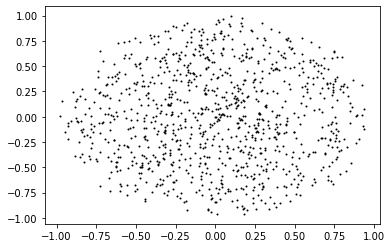

In [33]:
# scatterplot of x vs. y (no relation, randomly distributed)
plt.scatter(x[:1000],y[:1000],c='k', s=1)

In [11]:
# method for getting axes on non-halo data
def get_axes_test(x, y, z):
    return get_axes(x,y,z,nonzerocenter = True)

(array([  3.,   4.,  28.,  71., 148., 244., 239., 194.,  56.,  13.]),
 array([0.70395686, 0.73124143, 0.758526  , 0.78581057, 0.81309514,
        0.84037971, 0.86766428, 0.89494884, 0.92223341, 0.94951798,
        0.97680255]),
 <BarContainer object of 10 artists>)

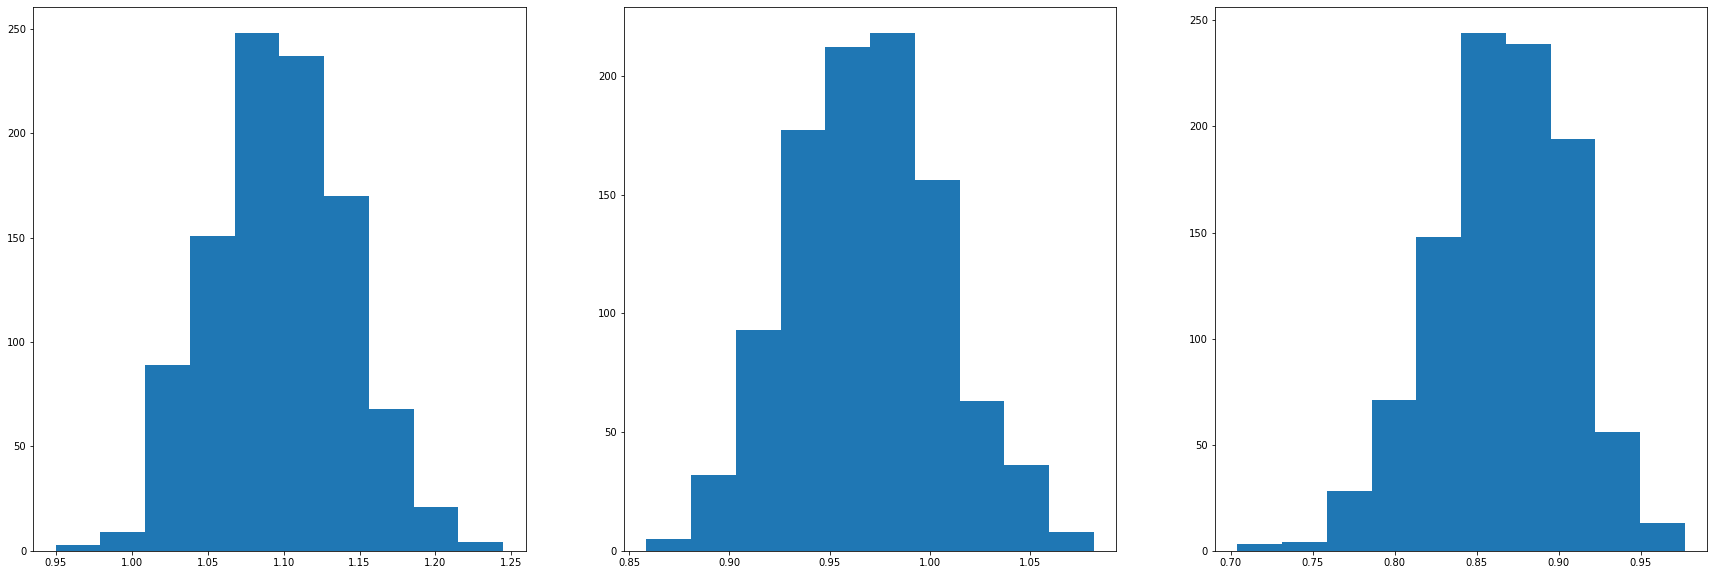

In [18]:
axes_test = []
x,y,z = random_ellipsoid(100,1,1,1)

for i in range(1000):
    bootstrapped = bootstrap(np.array([x,y,z]).T)
    a,b,c = get_axes_test(bootstrapped[:,0],bootstrapped[:,1],bootstrapped[:,2])
    axes_test.append([a,b,c])

axes_test = np.array(axes_test)
test = get_statistics(np.array([x,y,z]).T,1000,test=True)
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(test[:,0])
ax[1].hist(test[:,1])
ax[2].hist(test[:,2])

(array([ 6.,  6., 12.,  7., 15., 17., 21.,  4.,  9.,  3.]),
 array([-0.84608945, -0.66420974, -0.48233003, -0.30045033, -0.11857062,
         0.06330909,  0.24518879,  0.4270685 ,  0.6089482 ,  0.79082791,
         0.97270762]),
 <BarContainer object of 10 artists>)

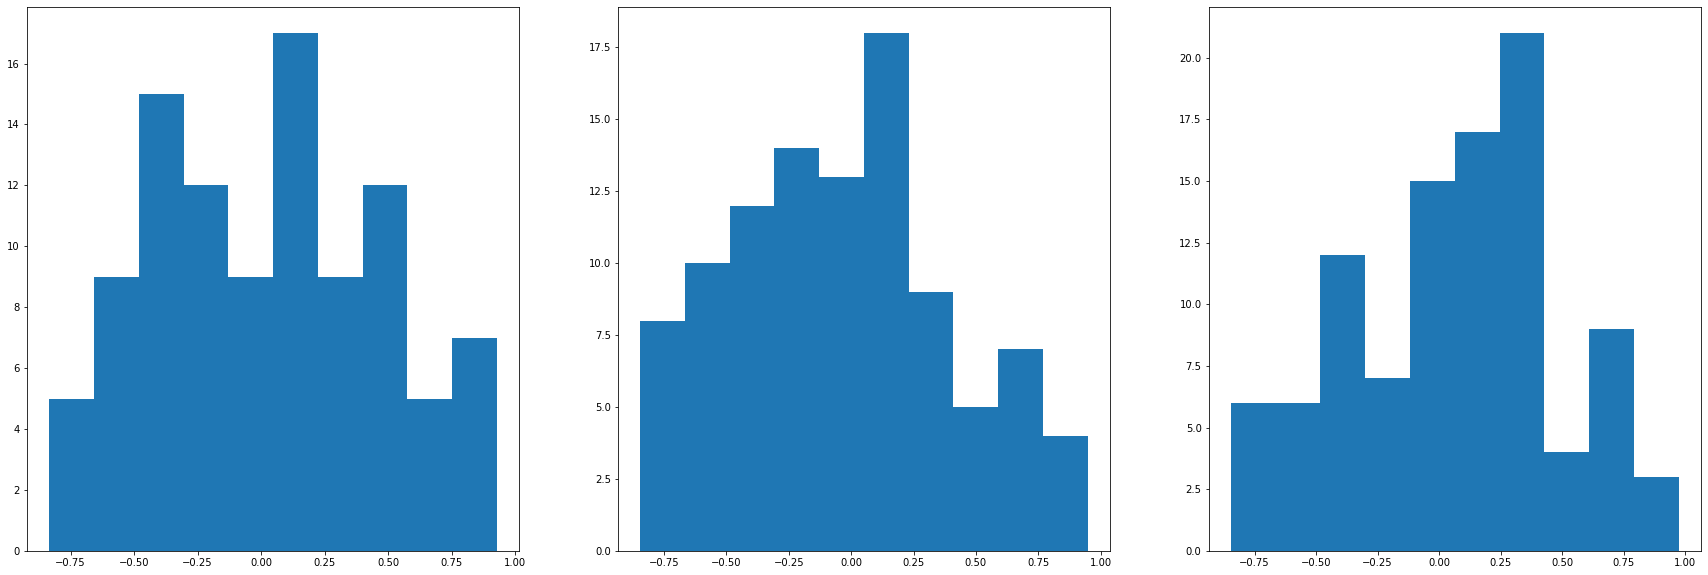

In [19]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(x, bins=10)
ax[1].hist(y, bins=10)
ax[2].hist(z, bins=10)

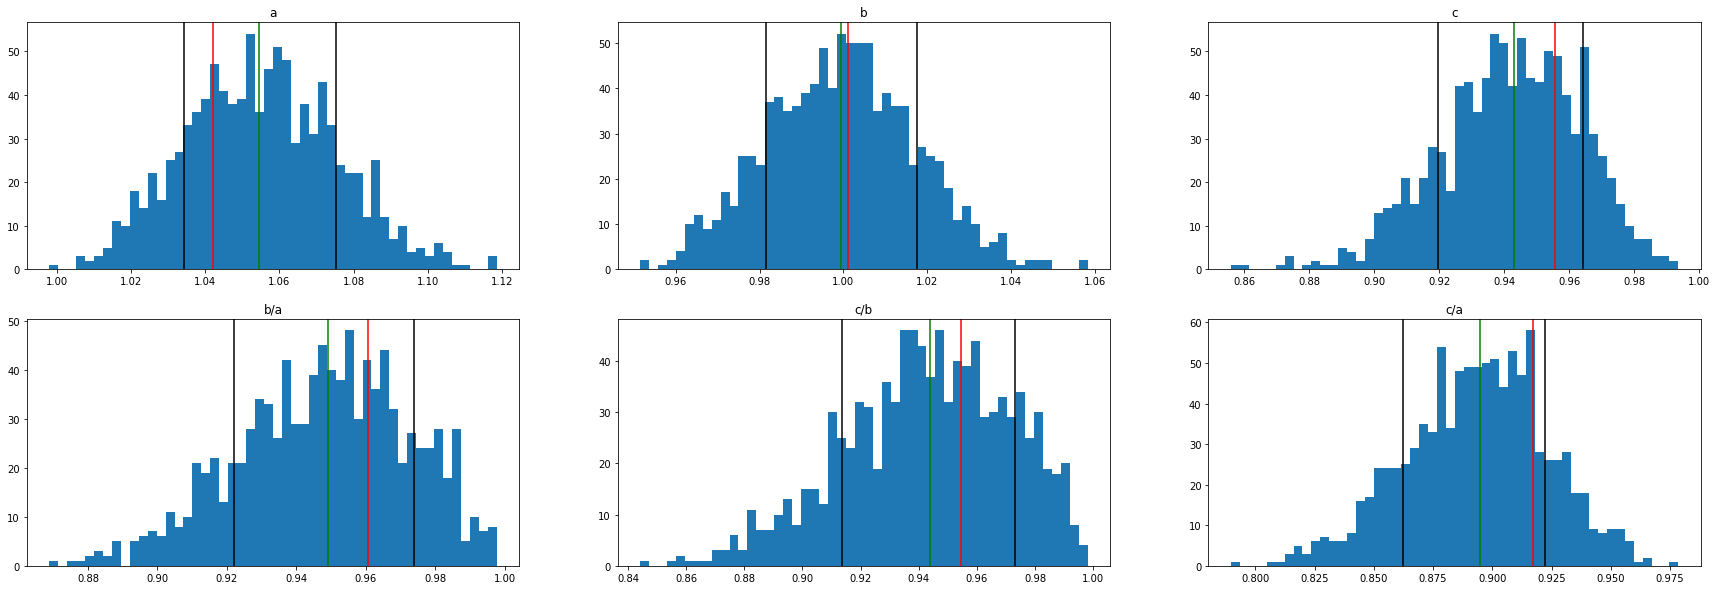

In [25]:
# test bootstrapping on random
x,y,z = random_ellipsoid(500,1,1,1)
halo_data = np.array([x,y,z]).T

halo_data_bootstrapped = get_statistics(halo_data,1000, True)
a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
real_a, real_b, real_c = get_axes_test(x,y,z)

# histograms of bootstrap sampled axes a/b/c
fig, ax = plt.subplots(2,3,figsize=(30,10))
ax[0,0].hist(a, bins=50)
ax[0,0].set_title('a')
quantiles = get_quantiles(a)
ax[0,0].axvline(x=quantiles['median'],c='g') 
ax[0,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,0].axvline(x=real_a,c='r') 

ax[0,1].hist(b, bins=50)
ax[0,1].set_title('b')
quantiles = get_quantiles(b)
ax[0,1].axvline(x=quantiles['median'],c='g') 
ax[0,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,1].axvline(x=real_b,c='r')

ax[0,2].hist(c, bins=50)
ax[0,2].set_title('c')
quantiles = get_quantiles(c)
ax[0,2].axvline(x=quantiles['median'],c='g') 
ax[0,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,2].axvline(x=real_c,c='r') 

ax[1,0].hist(b/a, bins=50)
ax[1,0].set_title('b/a')
quantiles = get_quantiles(b/a)
ax[1,0].axvline(x=quantiles['median'],c='g') 
ax[1,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,0].axvline(x=real_b/real_a,c='r') 

ax[1,1].hist(c/b, bins=50)
ax[1,1].set_title('c/b')
quantiles = get_quantiles(c/b)
ax[1,1].axvline(x=quantiles['median'],c='g') 
ax[1,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,1].axvline(x=real_c/real_b,c='r') 

ax[1,2].hist(c/a, bins=50)
ax[1,2].set_title('c/a')
quantiles = get_quantiles(c/a)
ax[1,2].axvline(x=quantiles['median'],c='g') 
ax[1,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,2].axvline(x=real_c/real_a,c='r') 

Text(0.5, 0, '$a_{bootstrap}/a_{random}$')

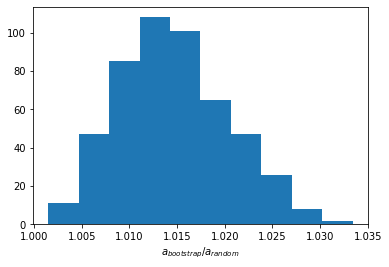

In [26]:
ratios = []
for i in range(500):
    x,y,z = random_ellipsoid(500,1,1,1)
    halo_data = np.array([x,y,z]).T

    halo_data_bootstrapped = get_statistics(halo_data,100, True)
    a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
    real_a, real_b, real_c = get_axes_test(x,y,z)
    ratios.append(np.quantile(a,0.5)/real_a)

plt.hist(np.array(ratios).flatten())
plt.xlabel(r'$a_{bootstrap}/a_{random}$')

Text(0.5, 0, '$a_{bootstrap}/a_{random}$')

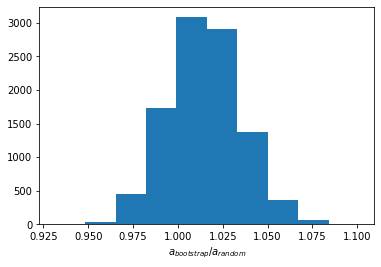

In [43]:
plt.hist(np.array(ratios).flatten())
plt.xlabel(r'$a_{bootstrap}/a_{random}$')

In [331]:
%matplotlib qt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(1-a, 1-b, 1-c, s=5, c='k')

In [61]:
# spacing of values
# n = [1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000]
n = np.logspace(0, 7, num = 100)

In [26]:
# parameters
n_iterations = 10
percent_errors = np.zeros((np.shape(n)[0],n_iterations,3))

# iterate through values
for i in range(len(n)):
    n_samples = int(n[i])
    
    axes = np.array([1,1,1])
    
    # n_iterations trials per value
    for j in range(n_iterations):
        x, y, z = random_ellipsoid(n_samples, axes[0], axes[1], axes[2])
        estimates = get_axes_test(x,y,z)
        # print(n_samples)
        # print(axes)
        # print(estimates)
        percent_errors[i][j] = (np.abs(axes-estimates)*100)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


Text(0.5, 0, '# Points')

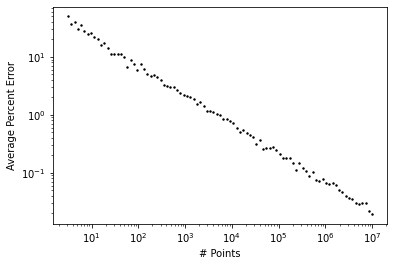

In [34]:
# values for 10 trials, averaged across a/b/c
plt.scatter(n, np.average(np.average(percent_errors, axis = 1),axis=1), c='k', s=2)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Average Percent Error')
plt.xlabel('# Points')

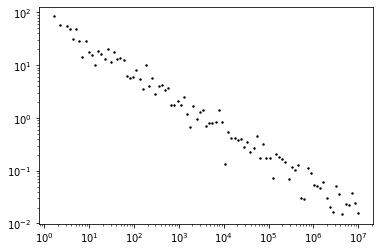

In [116]:
# values for 1 trial, averaged across a/b/c
plt.scatter(n, np.average(percent_errors, axis = 1), c='k', s=2)
plt.yscale('log')
plt.xscale('log')

In [35]:
# method to plot errors on any ellipsoid & any # iterations

def see_errors(a,b,c,min_val,max_val,n_vals,n_iterations):
    n = np.logspace(min_val, max_val, num = n_vals)
    percent_errors = np.zeros((np.shape(n)[0],n_iterations,3))

    for i in range(len(n)):
        n_samples = int(n[i])

        axes = np.array([1,1,1])

        for j in range(n_iterations):
            x, y, z = random_ellipsoid(n_samples, axes[0], axes[1], axes[2])
            estimates = get_axes_test(x,y,z)
            # print(n_samples)
            # print(axes)
            # print(estimates)
            percent_errors[i][j] = (np.abs(axes-estimates)*100)
    
    # plot n_vals vs. percent_error
    plt.scatter(n, np.average(np.average(percent_errors, axis = 1),axis=1), c='k', s=2)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Average Percent Error')
    plt.xlabel('# Points')
    plt.title('Errors on an Ellipse with Axes {a}, {b}, {c}'.format(a=a,b=b,c=c))

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


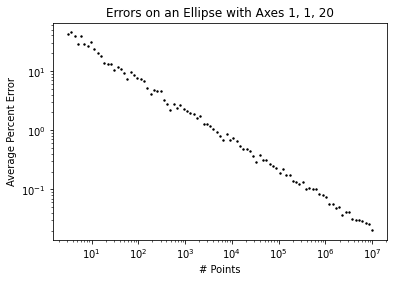

In [39]:
see_errors(1,1,20,0,7,100,10)

(array([11., 18., 25., 33., 69., 93., 64., 44., 23.,  9.]),
 array([121.692 , 121.9216, 122.1512, 122.3808, 122.6104, 122.84  ,
        123.0696, 123.2992, 123.5288, 123.7584, 123.988 ]),
 <BarContainer object of 10 artists>)

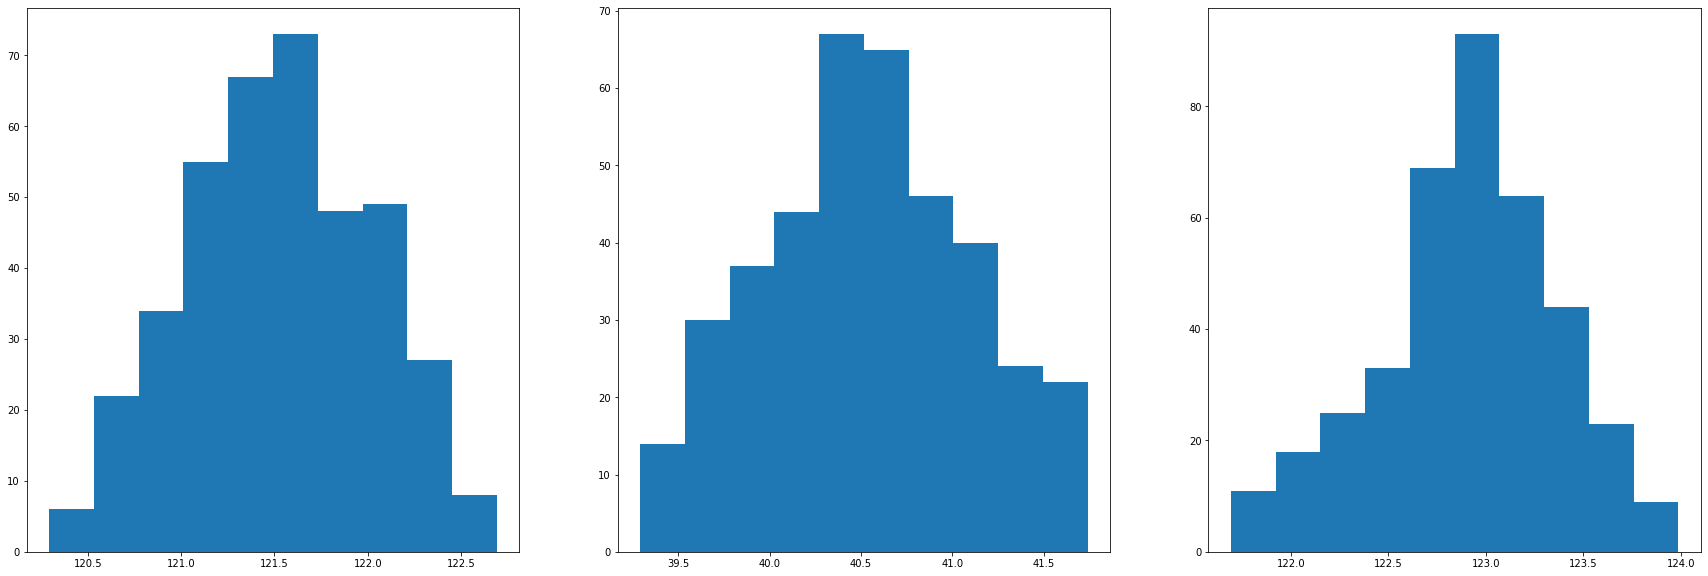

In [51]:
# original data for 480875
mvir, rvir, x, y, z = get_values(480875)
halo_data = np.array([x,y,z]).T

# make histograms of x/y/z for the original dataset
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(x,bins=10)
ax[1].hist(y, bins=10)
ax[2].hist(z, bins=10)

In [14]:
# bootstrap sampling method
# inefficient version!
def bootstrap(dataset, sample_size=1):
    # sample_size as a fraction of the original dataset
    current_size = 0
    sample = []
    # indices for random selection
    indices = np.arange(dataset.shape[0])
    
    # until sample size matches ideal size, select a random sample
    while current_size < (sample_size * dataset.shape[0]):
        random_index = np.random.choice(indices)
        draw = dataset[random_index]
        sample.append([draw[0],draw[1],draw[2]])
        current_size+=1
    
    return np.array(sample)

In [15]:
def bootstrap(dataset):
    """
    Method to perform bootstrap sampling on a dataset.
    """
    indices = np.arange(len(dataset))
    random_index = np.random.choice(indices[1:], len(dataset), replace=True)
    random_index[0] = 0
    return dataset[random_index]

(2.3033842409253467, 1.1104595581978898, 1.0270516574049848)

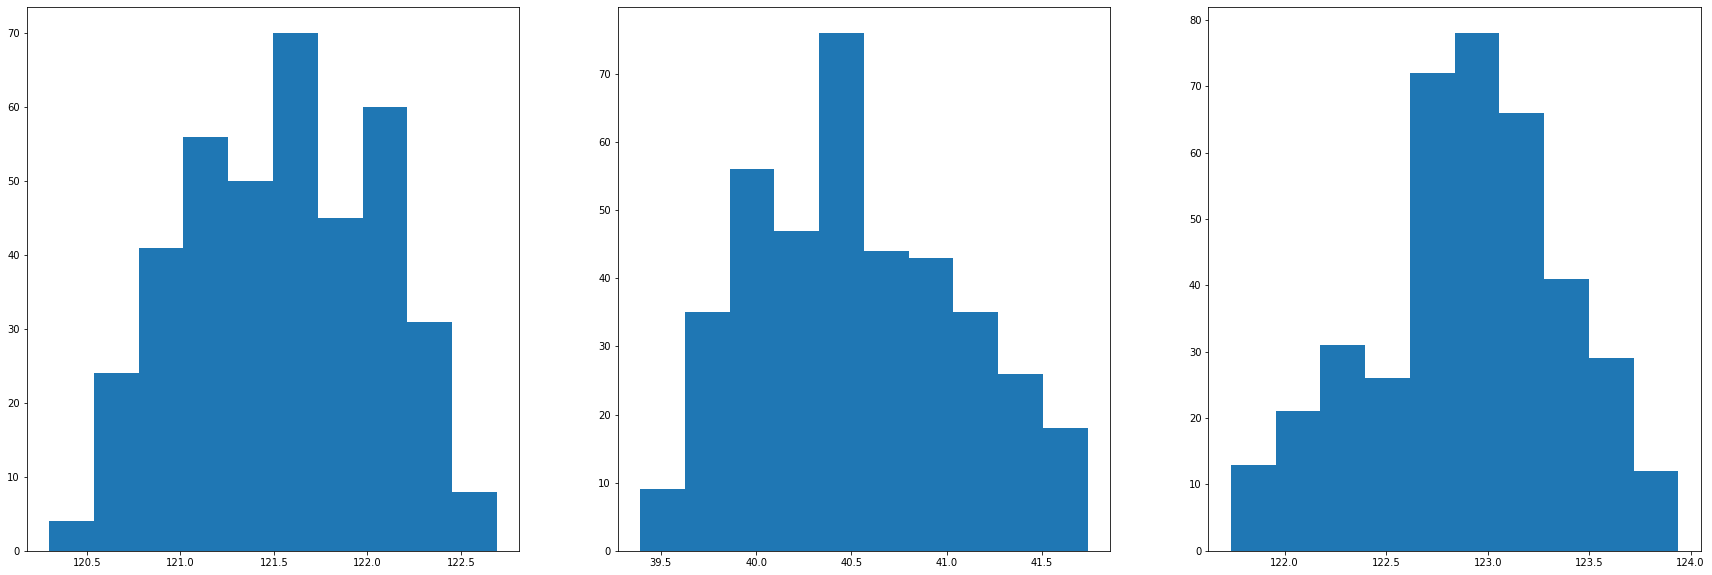

In [54]:
# histograms of x/y/z of sklearn resampled dataset
from sklearn.utils import resample
test = resample(halo_data, replace=True)
x2, y2, z2 = test[:,0], test[:,1], test[:,2]
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(x2,bins=10)
ax[1].hist(y2, bins=10)
ax[2].hist(z2, bins=10)
get_axes(x2,y2,z2)

(array([ 8., 22., 21., 33., 58., 87., 77., 53., 24.,  6.]),
 array([121.692 , 121.9168, 122.1416, 122.3664, 122.5912, 122.816 ,
        123.0408, 123.2656, 123.4904, 123.7152, 123.94  ]),
 <BarContainer object of 10 artists>)

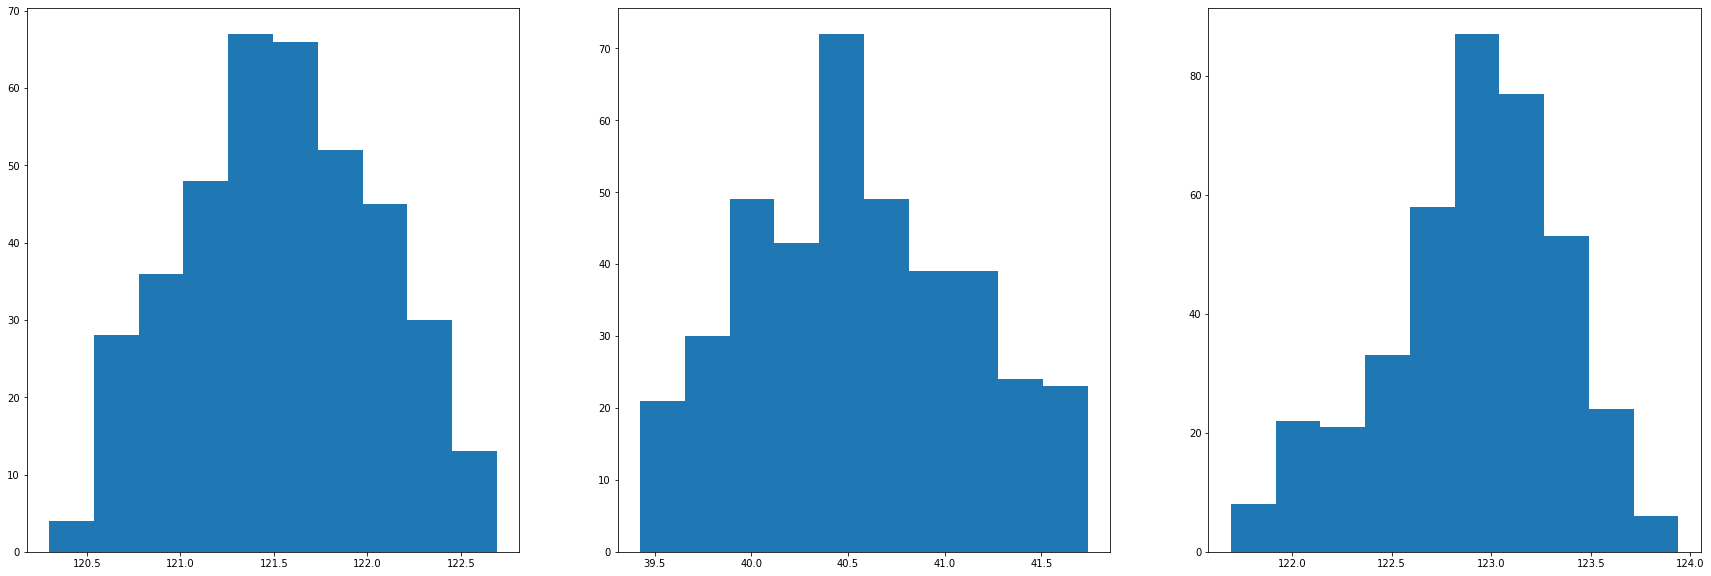

In [48]:
# histograms of x/y/z of bootstrap sampled dataset
test = bootstrap(halo_data)
x, y, z = test[:,0], test[:,1], test[:,2]
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(x,bins=10)
ax[1].hist(y, bins=10)
ax[2].hist(z, bins=10)

In [16]:
# method to repeat bootstrap sampling
def get_statistics(dataset, repetitions, test=False):
    all_axes = []
    
    # for each sample, calculate axes
    for i in range(repetitions):
        sample = bootstrap(dataset)
        if test:
            a,b,c = get_axes_test(sample[:,0],sample[:,1],sample[:,2])
        else:
            a,b,c = get_axes(sample[:,0],sample[:,1],sample[:,2])
        all_axes.append([a,b,c])
    
    # return all axes
    return np.array(all_axes)

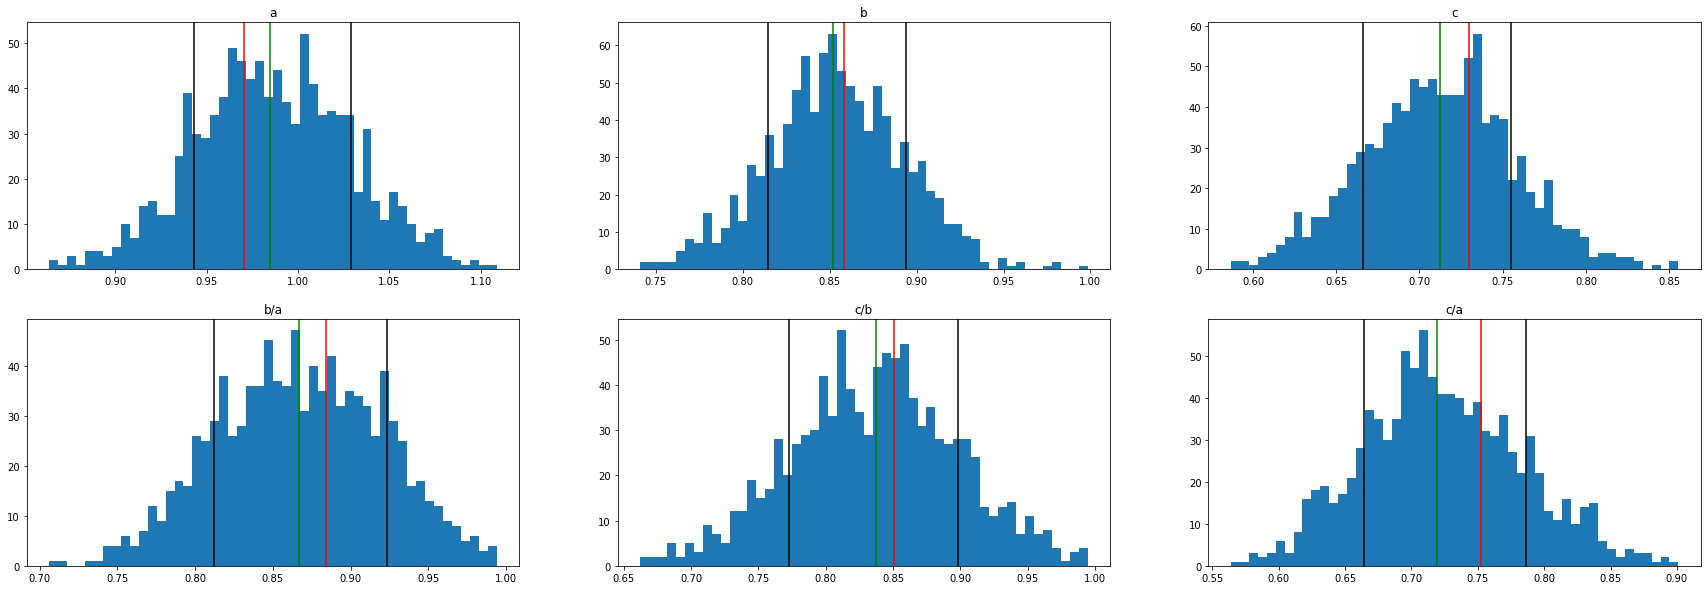

In [66]:
# test bootstrapping on 145287
mvir, rvir, x, y, z = get_values(145287)
halo_data = np.array([x,y,z]).T

halo_data_bootstrapped = get_statistics(halo_data,1000)
a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
real_a, real_b, real_c = get_axes(x,y,z)

# histograms of bootstrap sampled axes a/b/c on 480875
fig, ax = plt.subplots(2,3,figsize=(30,10))
ax[0,0].hist(a, bins=50)
ax[0,0].set_title('a')
quantiles = get_quantiles(a)
ax[0,0].axvline(x=quantiles['median'],c='g') 
ax[0,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,0].axvline(x=real_a,c='r') 

ax[0,1].hist(b, bins=50)
ax[0,1].set_title('b')
quantiles = get_quantiles(b)
ax[0,1].axvline(x=quantiles['median'],c='g') 
ax[0,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,1].axvline(x=real_b,c='r') 

ax[0,2].hist(c, bins=50)
ax[0,2].set_title('c')
quantiles = get_quantiles(c)
ax[0,2].axvline(x=quantiles['median'],c='g') 
ax[0,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,2].axvline(x=real_c,c='r') 

ax[1,0].hist(b/a, bins=50)
ax[1,0].set_title('b/a')
quantiles = get_quantiles(b/a)
ax[1,0].axvline(x=quantiles['median'],c='g') 
ax[1,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,0].axvline(x=real_b/real_a,c='r') 

ax[1,1].hist(c/b, bins=50)
ax[1,1].set_title('c/b')
quantiles = get_quantiles(c/b)
ax[1,1].axvline(x=quantiles['median'],c='g') 
ax[1,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,1].axvline(x=real_c/real_b,c='r') 

ax[1,2].hist(c/a, bins=50)
ax[1,2].set_title('c/a')
quantiles = get_quantiles(c/a)
ax[1,2].axvline(x=quantiles['median'],c='g') 
ax[1,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,2].axvline(x=real_c/real_a,c='r') 

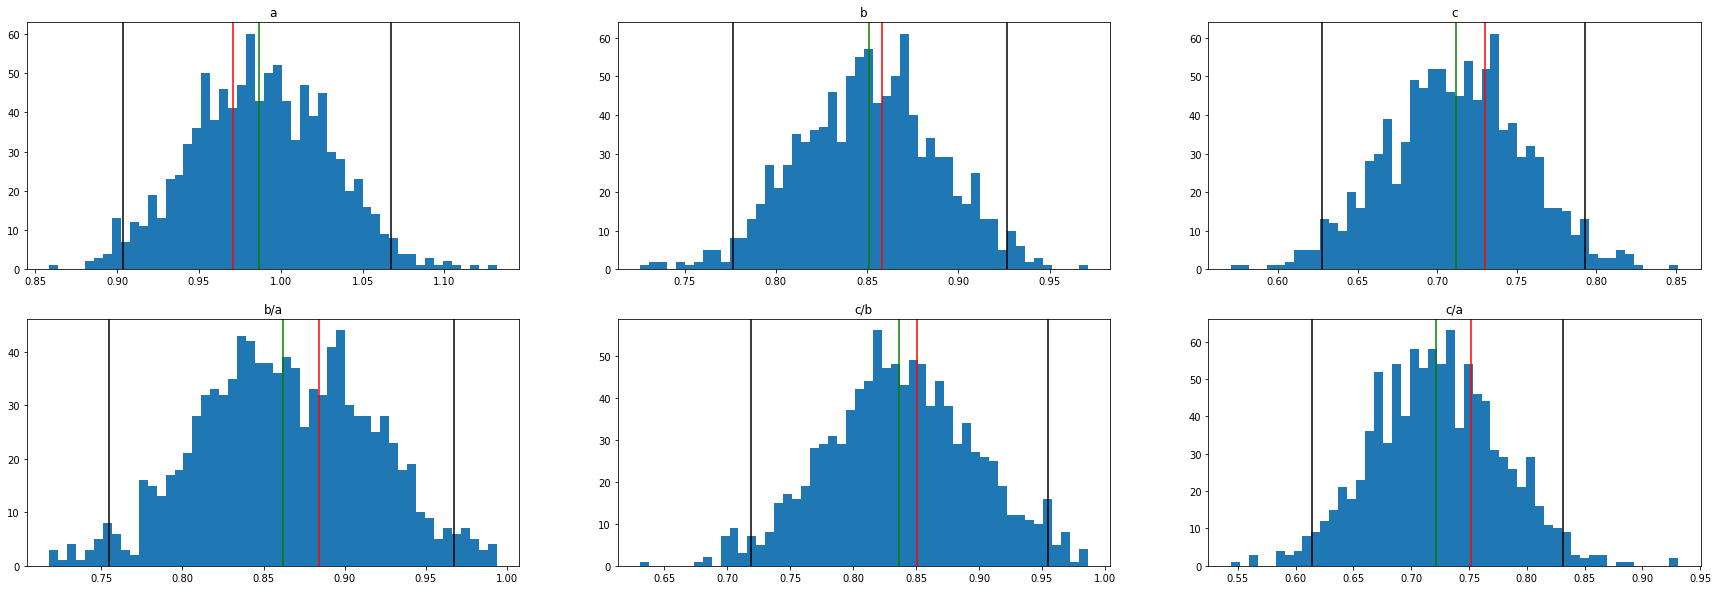

In [67]:
# test bootstrapping on 145287
mvir, rvir, x, y, z = get_values(145287)
halo_data = np.array([x,y,z]).T

halo_data_bootstrapped = get_statistics(halo_data,1000)
a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
real_a, real_b, real_c = get_axes(x,y,z)

# histograms of bootstrap sampled axes a/b/c on 480875
fig, ax = plt.subplots(2,3,figsize=(30,10))
ax[0,0].hist(a, bins=50)
ax[0,0].set_title('a')
quantiles = get_quantiles(a)
ax[0,0].axvline(x=quantiles['median'],c='g') 
ax[0,0].axvline(x=quantiles['2sigma'][0],c='k') 
ax[0,0].axvline(x=quantiles['2sigma'][1],c='k') 
ax[0,0].axvline(x=real_a,c='r') 

ax[0,1].hist(b, bins=50)
ax[0,1].set_title('b')
quantiles = get_quantiles(b)
ax[0,1].axvline(x=quantiles['median'],c='g') 
ax[0,1].axvline(x=quantiles['2sigma'][0],c='k') 
ax[0,1].axvline(x=quantiles['2sigma'][1],c='k') 
ax[0,1].axvline(x=real_b,c='r') 

ax[0,2].hist(c, bins=50)
ax[0,2].set_title('c')
quantiles = get_quantiles(c)
ax[0,2].axvline(x=quantiles['median'],c='g') 
ax[0,2].axvline(x=quantiles['2sigma'][0],c='k') 
ax[0,2].axvline(x=quantiles['2sigma'][1],c='k') 
ax[0,2].axvline(x=real_c,c='r') 

ax[1,0].hist(b/a, bins=50)
ax[1,0].set_title('b/a')
quantiles = get_quantiles(b/a)
ax[1,0].axvline(x=quantiles['median'],c='g') 
ax[1,0].axvline(x=quantiles['2sigma'][0],c='k') 
ax[1,0].axvline(x=quantiles['2sigma'][1],c='k') 
ax[1,0].axvline(x=real_b/real_a,c='r') 

ax[1,1].hist(c/b, bins=50)
ax[1,1].set_title('c/b')
quantiles = get_quantiles(c/b)
ax[1,1].axvline(x=quantiles['median'],c='g') 
ax[1,1].axvline(x=quantiles['2sigma'][0],c='k') 
ax[1,1].axvline(x=quantiles['2sigma'][1],c='k') 
ax[1,1].axvline(x=real_c/real_b,c='r') 

ax[1,2].hist(c/a, bins=50)
ax[1,2].set_title('c/a')
quantiles = get_quantiles(c/a)
ax[1,2].axvline(x=quantiles['median'],c='g') 
ax[1,2].axvline(x=quantiles['2sigma'][0],c='k') 
ax[1,2].axvline(x=quantiles['2sigma'][1],c='k') 
ax[1,2].axvline(x=real_c/real_a,c='r') 

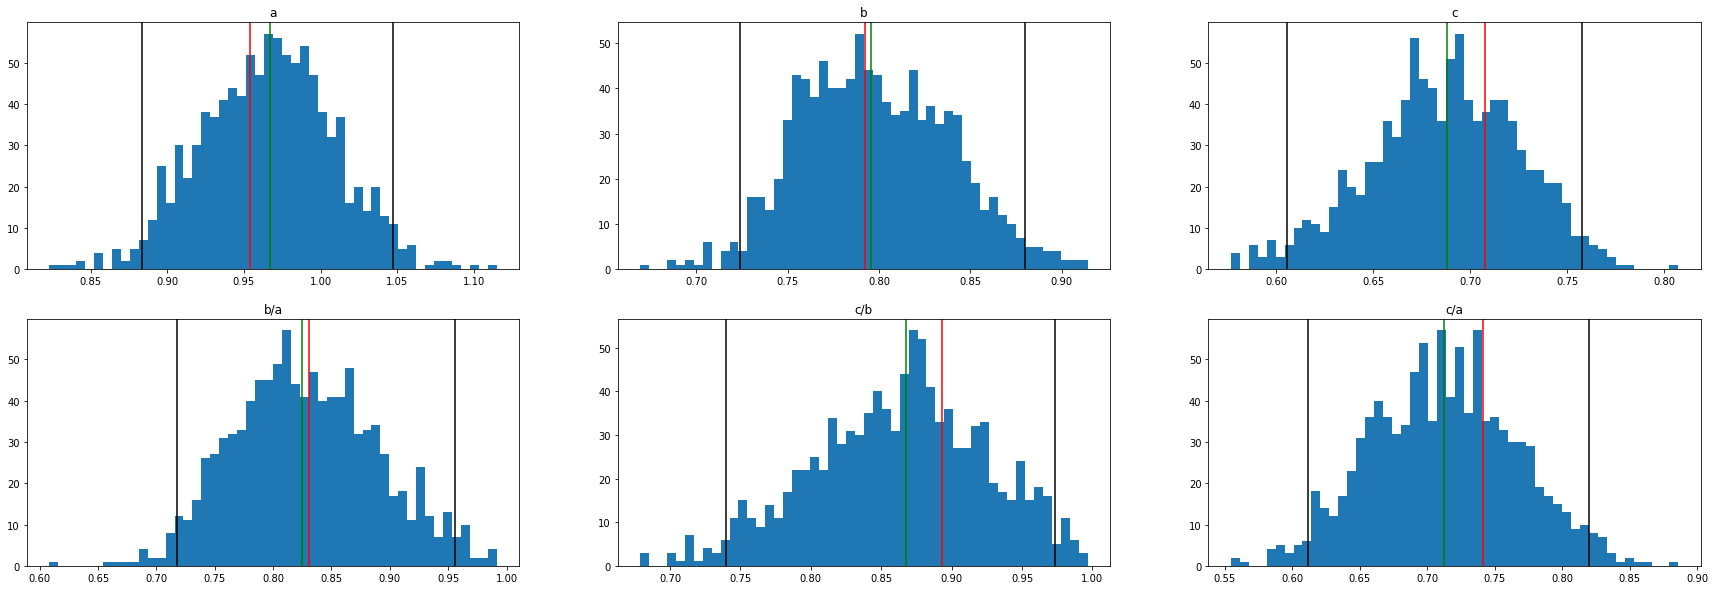

In [53]:
# test bootstrapping on 275633
mvir, rvir, x, y, z = get_values(275633)
halo_data = np.array([x,y,z]).T

halo_data_bootstrapped = get_statistics(halo_data,1000)
a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
real_a, real_b, real_c = get_axes(x,y,z)

# histograms of bootstrap sampled axes a/b/c on 480875
fig, ax = plt.subplots(2,3,figsize=(30,10))
ax[0,0].hist(a, bins=50)
ax[0,0].set_title('a')
quantiles = get_quantiles(a)
ax[0,0].axvline(x=quantiles['median'],c='g') 
ax[0,0].axvline(x=quantiles['2sigma'][0],c='k') 
ax[0,0].axvline(x=quantiles['2sigma'][1],c='k') 
ax[0,0].axvline(x=real_a,c='r') 

ax[0,1].hist(b, bins=50)
ax[0,1].set_title('b')
quantiles = get_quantiles(b)
ax[0,1].axvline(x=quantiles['median'],c='g') 
ax[0,1].axvline(x=quantiles['2sigma'][0],c='k') 
ax[0,1].axvline(x=quantiles['2sigma'][1],c='k') 
ax[0,1].axvline(x=real_b,c='r') 

ax[0,2].hist(c, bins=50)
ax[0,2].set_title('c')
quantiles = get_quantiles(c)
ax[0,2].axvline(x=quantiles['median'],c='g') 
ax[0,2].axvline(x=quantiles['2sigma'][0],c='k') 
ax[0,2].axvline(x=quantiles['2sigma'][1],c='k') 
ax[0,2].axvline(x=real_c,c='r') 

ax[1,0].hist(b/a, bins=50)
ax[1,0].set_title('b/a')
quantiles = get_quantiles(b/a)
ax[1,0].axvline(x=quantiles['median'],c='g') 
ax[1,0].axvline(x=quantiles['2sigma'][0],c='k') 
ax[1,0].axvline(x=quantiles['2sigma'][1],c='k') 
ax[1,0].axvline(x=real_b/real_a,c='r') 

ax[1,1].hist(c/b, bins=50)
ax[1,1].set_title('c/b')
quantiles = get_quantiles(c/b)
ax[1,1].axvline(x=quantiles['median'],c='g') 
ax[1,1].axvline(x=quantiles['2sigma'][0],c='k') 
ax[1,1].axvline(x=quantiles['2sigma'][1],c='k') 
ax[1,1].axvline(x=real_c/real_b,c='r') 

ax[1,2].hist(c/a, bins=50)
ax[1,2].set_title('c/a')
quantiles = get_quantiles(c/a)
ax[1,2].axvline(x=quantiles['median'],c='g') 
ax[1,2].axvline(x=quantiles['2sigma'][0],c='k') 
ax[1,2].axvline(x=quantiles['2sigma'][1],c='k') 
ax[1,2].axvline(x=real_c/real_a,c='r') 

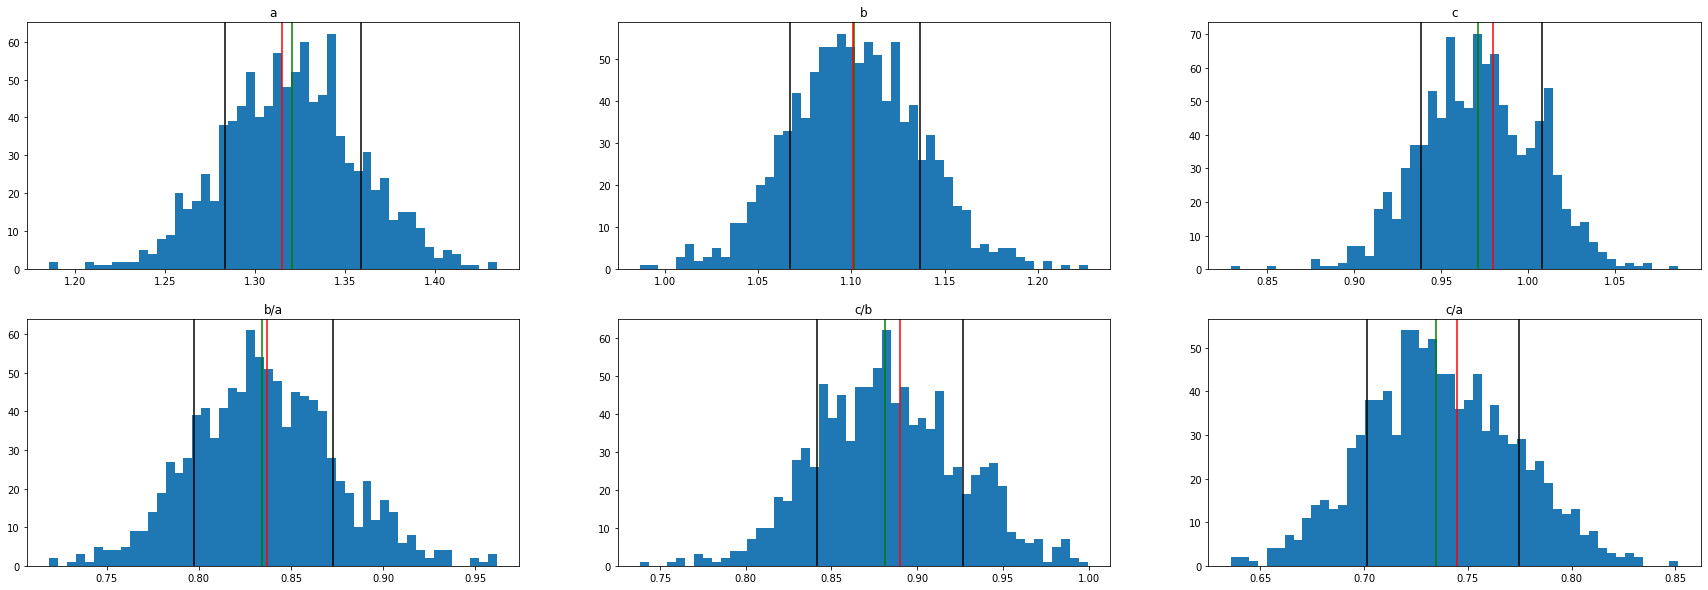

In [23]:
#testing sampling on 480875
mvir, rvir, x, y, z = get_values(480875)
halo_data = np.array([x,y,z]).T

halo_data_bootstrapped = get_statistics(halo_data,1000)
a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
real_a, real_b, real_c = get_axes(x,y,z)

# histograms of bootstrap sampled axes a/b/c on 480875
fig, ax = plt.subplots(2,3,figsize=(30,10))
ax[0,0].hist(a, bins=50) 
ax[0,0].set_title('a')
quantiles = get_quantiles(a)
ax[0,0].axvline(x=quantiles['median'],c='g') 
ax[0,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,0].axvline(x=real_a,c='r') 

ax[0,1].hist(b, bins=50)
ax[0,1].set_title('b')
quantiles = get_quantiles(b)
ax[0,1].axvline(x=quantiles['median'],c='g') 
ax[0,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,1].axvline(x=real_b,c='r') 

ax[0,2].hist(c, bins=50)
ax[0,2].set_title('c')
quantiles = get_quantiles(c)
ax[0,2].axvline(x=quantiles['median'],c='g') 
ax[0,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,2].axvline(x=real_c,c='r') 

ax[1,0].hist(b/a, bins=50)
ax[1,0].set_title('b/a')
quantiles = get_quantiles(b/a)
ax[1,0].axvline(x=quantiles['median'],c='g') 
ax[1,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,0].axvline(x=real_b/real_a,c='r') 

ax[1,1].hist(c/b, bins=50)
ax[1,1].set_title('c/b')
quantiles = get_quantiles(c/b)
ax[1,1].axvline(x=quantiles['median'],c='g') 
ax[1,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,1].axvline(x=real_c/real_b,c='r') 

ax[1,2].hist(c/a, bins=50)
ax[1,2].set_title('c/a')
quantiles = get_quantiles(c/a)
ax[1,2].axvline(x=quantiles['median'],c='g') 
ax[1,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,2].axvline(x=real_c/real_a,c='r') 

# the dip is at 1.0???

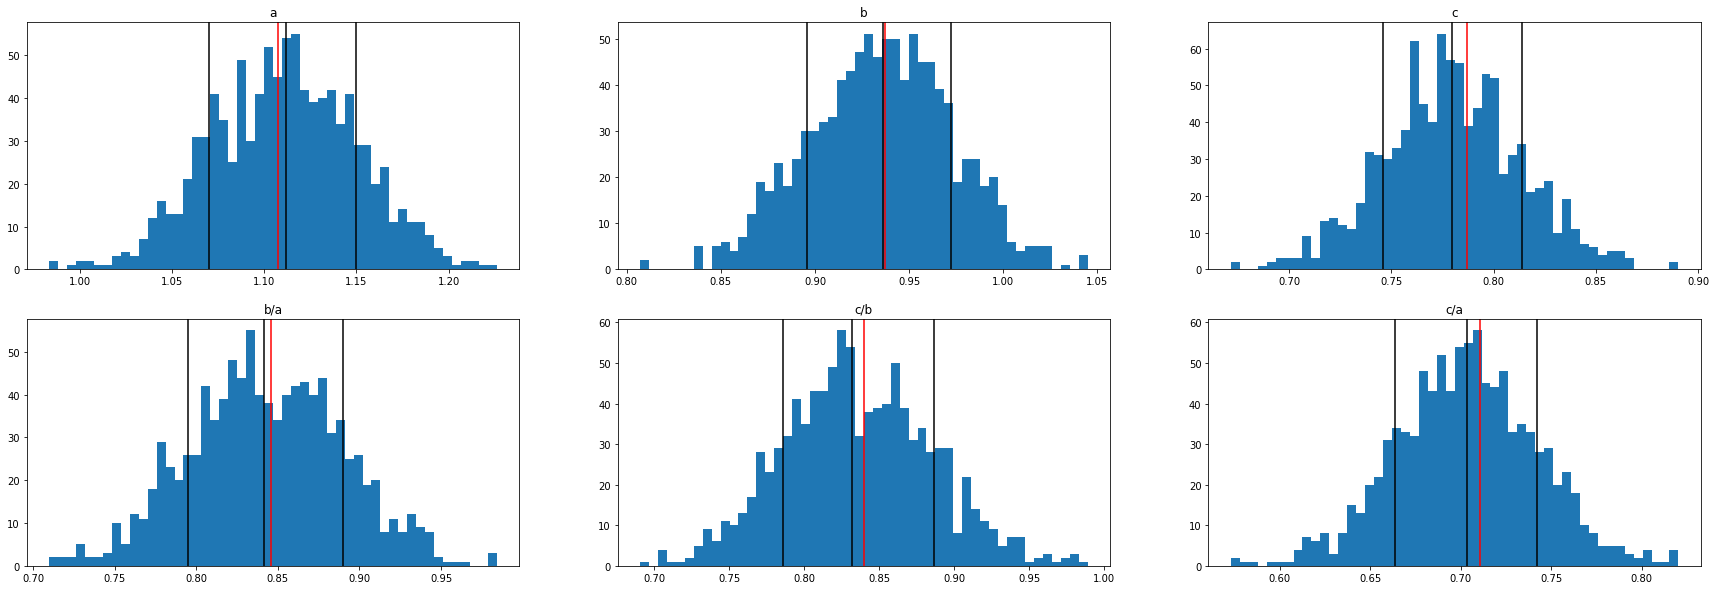

In [17]:
#testing sampling on  406861
mvir, rvir, x, y, z = get_values(406861)
halo_data = np.array([x,y,z]).T

halo_data_bootstrapped = get_statistics(halo_data,1000)
a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
real_a, real_b, real_c = get_axes(x,y,z)

# histograms of bootstrap sampled axes a/b/c on 480875
fig, ax = plt.subplots(2,3,figsize=(30,10))
ax[0,0].hist(a, bins=50)
ax[0,0].set_title('a')
quantiles = get_quantiles(a)
ax[0,0].axvline(x=quantiles['median'],c='k') 
ax[0,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,0].axvline(x=real_a,c='r') 

ax[0,1].hist(b, bins=50)
ax[0,1].set_title('b')
quantiles = get_quantiles(b)
ax[0,1].axvline(x=quantiles['median'],c='k') 
ax[0,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,1].axvline(x=real_b,c='r') 

ax[0,2].hist(c, bins=50)
ax[0,2].set_title('c')
quantiles = get_quantiles(c)
ax[0,2].axvline(x=quantiles['median'],c='k') 
ax[0,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,2].axvline(x=real_c,c='r') 

ax[1,0].hist(b/a, bins=50)
ax[1,0].set_title('b/a')
quantiles = get_quantiles(b/a)
ax[1,0].axvline(x=quantiles['median'],c='k') 
ax[1,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,0].axvline(x=real_b/real_a,c='r') 

ax[1,1].hist(c/b, bins=50)
ax[1,1].set_title('c/b')
quantiles = get_quantiles(c/b)
ax[1,1].axvline(x=quantiles['median'],c='k') 
ax[1,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,1].axvline(x=real_c/real_b,c='r') 

ax[1,2].hist(c/a, bins=50)
ax[1,2].set_title('c/a')
quantiles = get_quantiles(c/a)
ax[1,2].axvline(x=quantiles['median'],c='k') 
ax[1,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,2].axvline(x=real_c/real_a,c='r') 

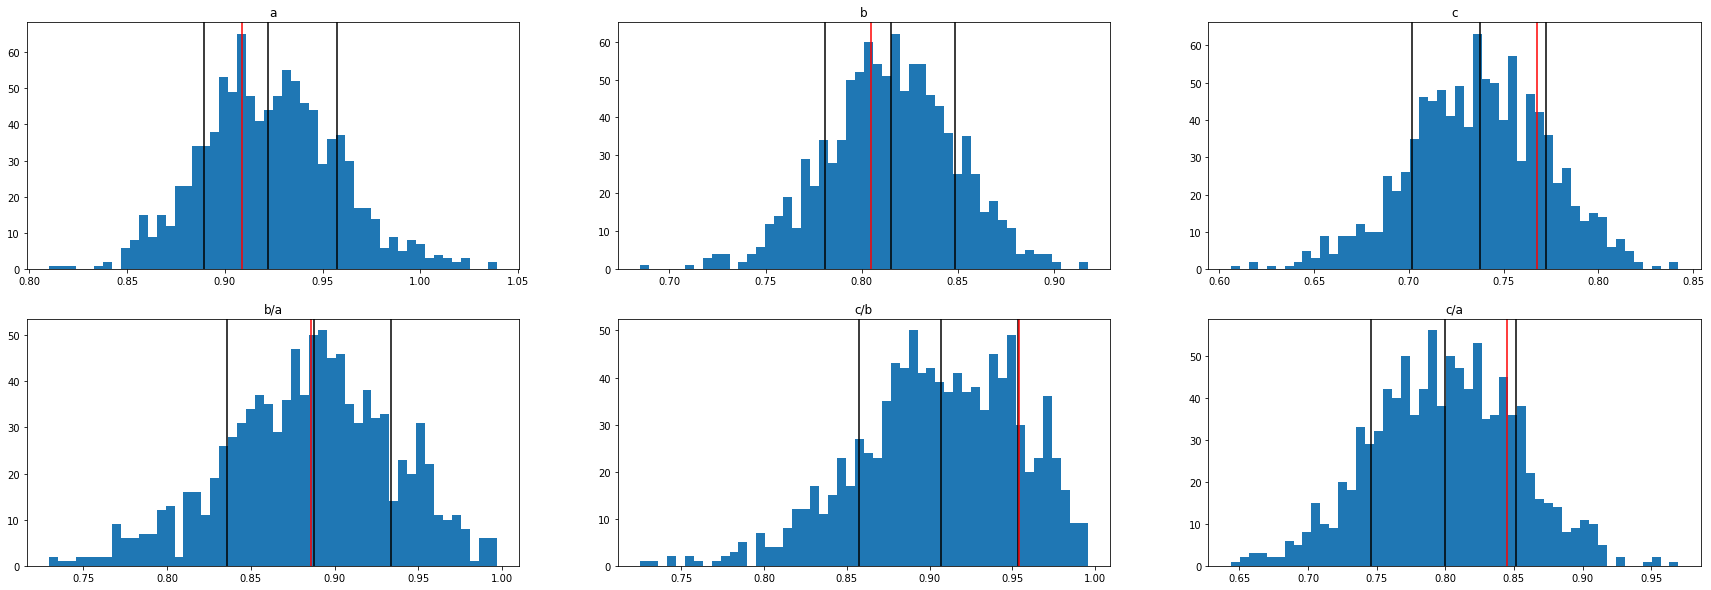

In [69]:
#testing sampling on  612247
mvir, rvir, x, y, z = get_values(612247)
halo_data = np.array([x,y,z]).T

halo_data_bootstrapped = get_statistics(halo_data,1000)
a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
real_a, real_b, real_c = get_axes(x,y,z)

# histograms of bootstrap sampled axes a/b/c on 480875
fig, ax = plt.subplots(2,3,figsize=(30,10))
ax[0,0].hist(a, bins=50)
ax[0,0].set_title('a')
quantiles = get_quantiles(a)
ax[0,0].axvline(x=quantiles['median'],c='k') 
ax[0,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,0].axvline(x=real_a,c='r') 

ax[0,1].hist(b, bins=50)
ax[0,1].set_title('b')
quantiles = get_quantiles(b)
ax[0,1].axvline(x=quantiles['median'],c='k') 
ax[0,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,1].axvline(x=real_b,c='r') 

ax[0,2].hist(c, bins=50)
ax[0,2].set_title('c')
quantiles = get_quantiles(c)
ax[0,2].axvline(x=quantiles['median'],c='k') 
ax[0,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[0,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[0,2].axvline(x=real_c,c='r') 

ax[1,0].hist(b/a, bins=50)
ax[1,0].set_title('b/a')
quantiles = get_quantiles(b/a)
ax[1,0].axvline(x=quantiles['median'],c='k') 
ax[1,0].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,0].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,0].axvline(x=real_b/real_a,c='r') 

ax[1,1].hist(c/b, bins=50)
ax[1,1].set_title('c/b')
quantiles = get_quantiles(c/b)
ax[1,1].axvline(x=quantiles['median'],c='k') 
ax[1,1].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,1].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,1].axvline(x=real_c/real_b,c='r') 

ax[1,2].hist(c/a, bins=50)
ax[1,2].set_title('c/a')
quantiles = get_quantiles(c/a)
ax[1,2].axvline(x=quantiles['median'],c='k') 
ax[1,2].axvline(x=quantiles['1sigma'][0],c='k') 
ax[1,2].axvline(x=quantiles['1sigma'][1],c='k') 
ax[1,2].axvline(x=real_c/real_a,c='r') 

In [13]:
# method to get 1sigma, 2sigma, 3sigma quantiles
def get_quantiles(data):
    quantiles = {'median': np.quantile(data,0.5),
                 '1sigma': [np.quantile(data,0.159),np.quantile(data,0.841)],
                 '2sigma': [np.quantile(data, 0.023),np.quantile(data,0.977)],
                 '3sigma': [np.quantile(data,0.002),np.quantile(data,0.998)]}
    return quantiles

In [92]:
quantiles = get_quantiles(c/b)
# get mass, median value, 1sigma +/- values
[mvir[0], quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']]

[260000000000000.0,
 0.9408060003747437,
 0.12040057918934399,
 0.29634651150429614]

In [91]:
names = np.array([])

for i in set(name):
    names = np.append(names,i)

names

array([145286., 145287., 250374., 612244., 612245., 612246.,  73365.,
       612247., 528161.,  46114.,  46115., 528162.,  46116., 118057.,
       275633., 275634., 275635., 275636., 553785., 553786., 644539.,
       644540., 644541., 644542., 644543.,  91207., 406861., 406862.,
       406863., 206928., 504143., 406864., 206929., 206930., 206931.,
       167510., 167511., 167512., 384729., 167513., 455011., 455012.,
       455013., 335846., 335847., 480875., 363244., 580978., 580979.])

In [18]:
# setup
a_values = []
b_values = []
c_values = []
ba_values = []
cb_values = []
ca_values = []
counter = 0

# for every halo in the dataset
for i in set(name):
    
    #if int(i) != 145287 and int(i) != 580979:
    print(i)

    # get data
    mvir, rvir, x, y, z = get_values(int(i))
    halo_data = np.array([x,y,z]).T

    # run bootstrap sampling
    halo_data_bootstrapped = get_statistics(halo_data,10000)
    a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]


    #if counter % 1 == 0:
        #print(a)
        #print(b)
        #print(c)

    counter+=1

    # get quantiles for a, b, c, b/a, c/b, c/a
    quantiles = get_quantiles(a)
    a_values.append([mvir[0], quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(b)
    b_values.append([mvir[0], quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(c)
    c_values.append([mvir[0], quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(b/a)
    ba_values.append([mvir[0], quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(c/b)
    cb_values.append([mvir[0], quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(c/a)
    ca_values.append([mvir[0], quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

145286.0
145287.0


KeyboardInterrupt: 

In [ ]:
a = np.array(a_values)
b = np.array(b_values)
c = np.array(c_values)
ca = np.array(ca_values)
ba = np.array(ba_values)
cb = np.array(cb_values)

Text(0, 0.5, 'c/a')

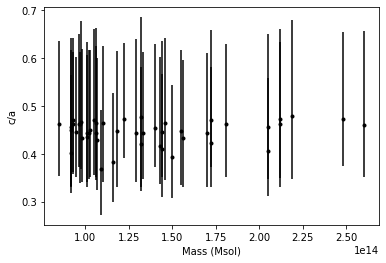

In [27]:
plt.errorbar(ca[:,0],ca[:,1],yerr=ca[:, 2:].T, fmt='.k')
plt.xlabel(r'Mass (\(M_\odot\))')
plt.ylabel('c/a')

<ErrorbarContainer object of 3 artists>

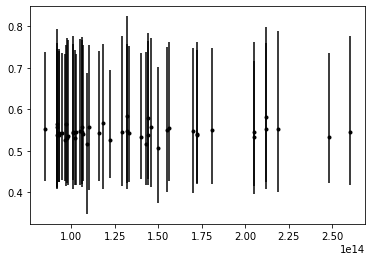

In [28]:
plt.errorbar(ba[:,0],ba[:,1],yerr=ba[:, 2:].T, fmt='.k')
plt.xlabel(r'Mass (\(M_\odot\))')
plt.ylabel('b/a')

<ErrorbarContainer object of 3 artists>

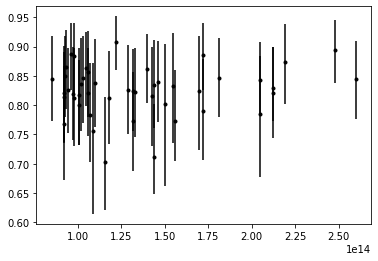

In [29]:
plt.errorbar(cb[:,0],cb[:,1],yerr=cb[:, 2:].T, fmt='.k')
plt.xlabel(r'Mass (\(M_\odot\))')
plt.ylabel('c/b')

(0.0, 1.0)

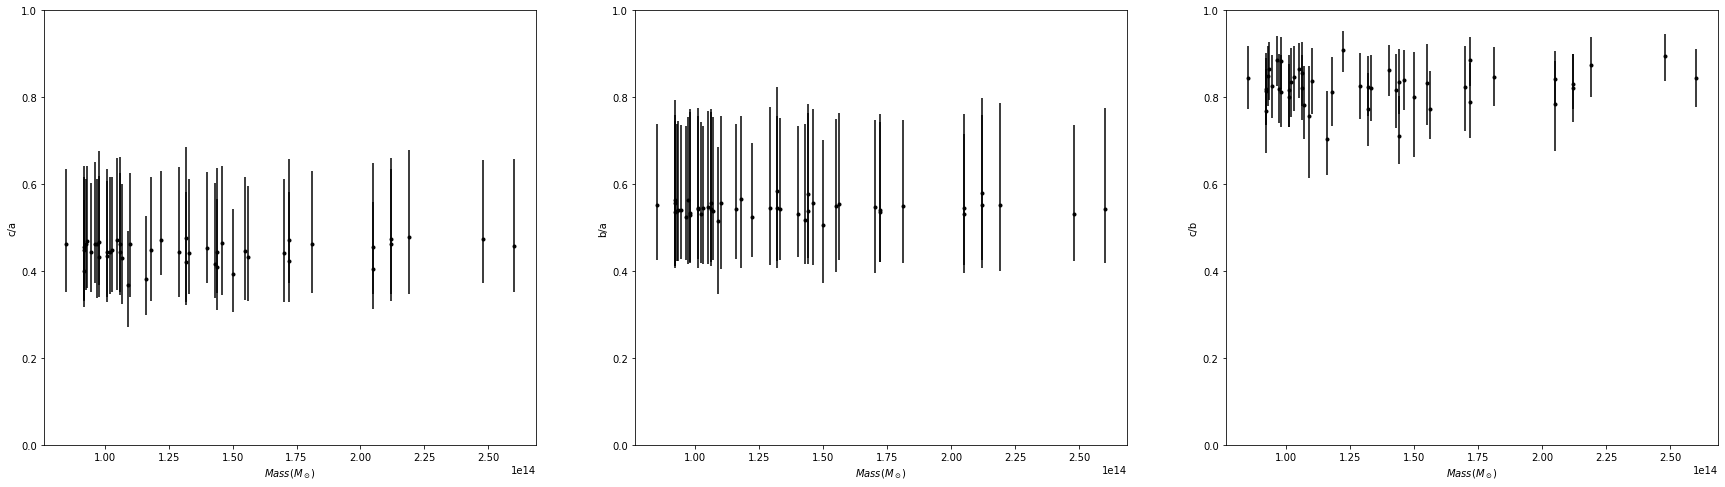

In [57]:

%matplotlib inline
fig, ax = plt.subplots(1,3,figsize=(30,8))
ax[0].errorbar(ca[:,0],ca[:,1],yerr=ca[:, 2:].T, fmt='.k')
ax[0].set_xlabel(r'$Mass (M_\odot)$')
ax[0].set_ylabel('c/a')
ax[0].set_ylim(0.0,1.0)
ax[1].errorbar(ba[:,0],ba[:,1],yerr=ba[:, 2:].T, fmt='.k')
ax[1].set_xlabel(r'$Mass (M_\odot)$')
ax[1].set_ylabel('b/a')
ax[1].set_ylim(0.0,1.0)
ax[2].errorbar(cb[:,0],cb[:,1],yerr=cb[:, 2:].T, fmt='.k')
ax[2].set_xlabel(r'$Mass (M_\odot)$')
ax[2].set_ylabel('c/b')
ax[2].set_ylim(0.0,1.0)

In [35]:
# setup
a_values_test = []
b_values_test = []
c_values_test = []
ba_values_test = []
cb_values_test = []
ca_values_test = []
counter = 0

# for every halo in the dataset
for i in range(50):
    print(i)
    # get data
    x,y,z = random_ellipsoid(500,1,1,1)
    halo_data = np.array([x,y,z]).T

    # run bootstrap sampling
    halo_data_bootstrapped = get_statistics(halo_data,10000)
    a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]


    #if counter % 1 == 0:
        #print(a)
        #print(b)
        #print(c)

    counter+=1

    # get quantiles for a, b, c, b/a, c/b, c/a
    quantiles = get_quantiles(a)
    a_values_test.append([quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(b)
    b_values_test.append([quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(c)
    c_values_test.append([quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(b/a)
    ba_values_test.append([quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(c/b)
    cb_values_test.append([quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    quantiles = get_quantiles(c/a)
    ca_values_test.append([quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0.5, 1.0, 'c/b')

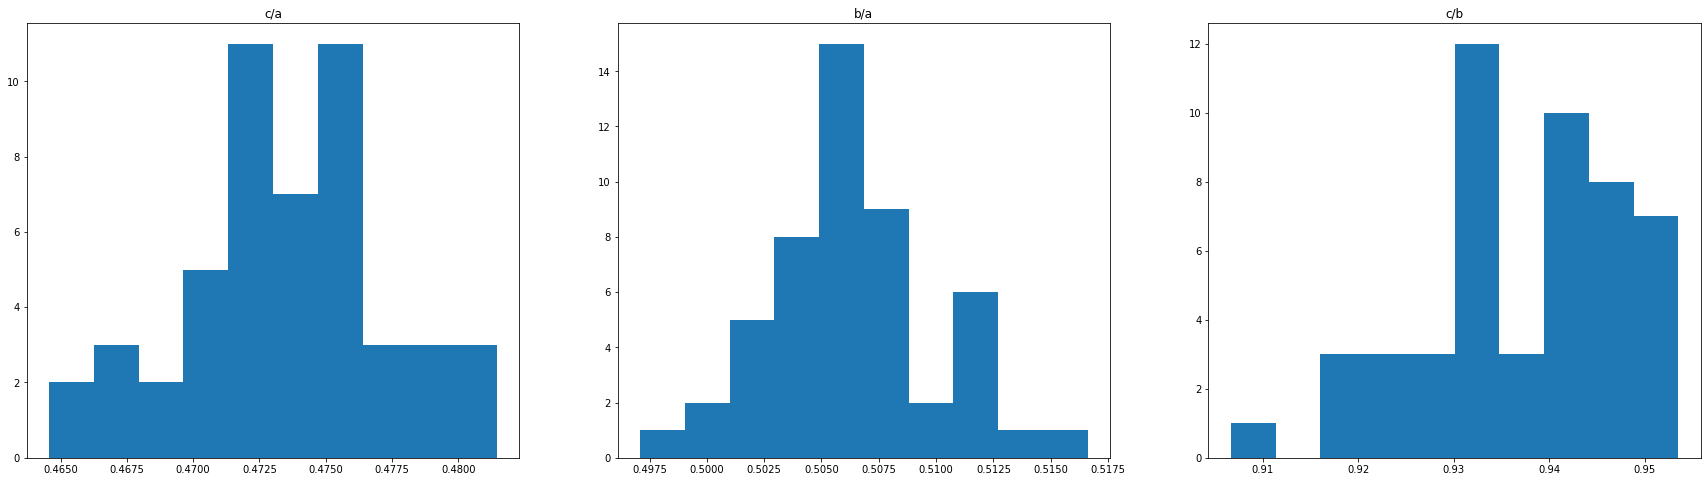

In [36]:
a = np.array(a_values_test)
b = np.array(b_values_test)
c = np.array(c_values_test)
ca = np.array(ca_values_test)
ba = np.array(ba_values_test)
cb = np.array(cb_values_test)
 
fig, ax = plt.subplots(1,3,figsize=(30,8))
ax[0].hist(ca[:,0])
ax[0].set_title('c/a')
ax[1].hist(ba[:,0])
ax[1].set_title('b/a')
ax[2].hist(cb[:,0])
ax[2].set_title('c/b')

Text(0.5, 1.0, 'c/b')

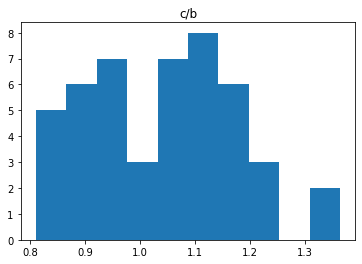

In [208]:
plt.hist(cb[:,1])
plt.title('c/b')

Text(0.5, 1.0, 'c/a')

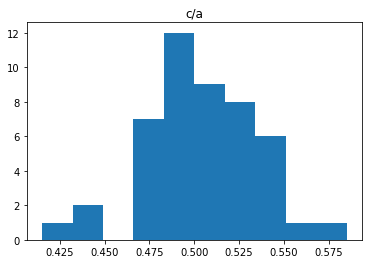

In [209]:
plt.hist(ca[:,1])
plt.title('c/a')

Text(0.5, 1.0, 'b/a')

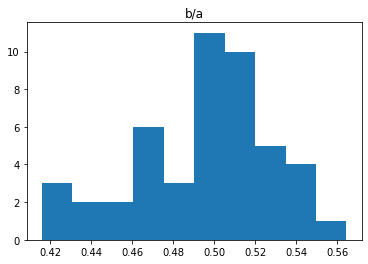

In [210]:
plt.hist(ba[:,1])
plt.title('b/a')

(array([ 8., 12.,  4.,  2.,  6.,  5.,  1.,  3.,  1.,  0.,  4.,  1.,  0.,
         1.,  1.]),
 array([8.5100e+13, 9.6760e+13, 1.0842e+14, 1.2008e+14, 1.3174e+14,
        1.4340e+14, 1.5506e+14, 1.6672e+14, 1.7838e+14, 1.9004e+14,
        2.0170e+14, 2.1336e+14, 2.2502e+14, 2.3668e+14, 2.4834e+14,
        2.6000e+14]),
 <BarContainer object of 15 artists>)

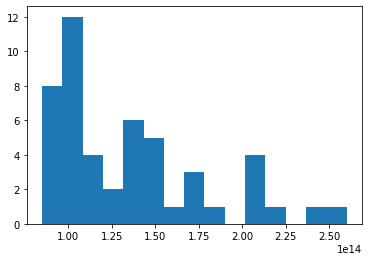

In [152]:
# histogram of mass distribution
masses = []
for i in set(name):
    mvir, rvir, x, y, z = get_values(int(i))
    masses.append(mvir[0])

plt.hist(masses, bins=15)

In [41]:
# problems: 580979, 145287
%matplotlib qt 
plot_3d(get_values(145287)[1:])

In [42]:
# problems: 580979, 145287
get_values(145287)[1].shape

(126,)

In [19]:
# setup
a_values = []
b_values = []
c_values = []
ba_values = []
cb_values = []
ca_values = []
counter = 0
halo = 480875
n = np.logspace(9,13,num=100)
# for every halo in the dataset
for i in n:
    #if int(i) != 145287 and int(i) != 580979:
    print(i)

    # get data
    mvir, rvir, x, y, z = get_values(halo, minmass=i)
    if mvir.shape[0]>1:
        halo_data = np.array([x,y,z]).T

        # run bootstrap sampling
        halo_data_bootstrapped = get_statistics(halo_data,10000)
        a,b,c = halo_data_bootstrapped[:,0], halo_data_bootstrapped[:,1], halo_data_bootstrapped[:,2]
        
        # get quantiles for a, b, c, b/a, c/b, c/a
        quantiles = get_quantiles(a)
        a_values.append([i, quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

        quantiles = get_quantiles(b)
        b_values.append([i, quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

        quantiles = get_quantiles(c)
        c_values.append([i, quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

        quantiles = get_quantiles(b/a)
        ba_values.append([i, quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

        quantiles = get_quantiles(c/b)
        cb_values.append([i, quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

        quantiles = get_quantiles(c/a)
        ca_values.append([i, quantiles['median'],quantiles['median']-quantiles['1sigma'][0],quantiles['1sigma'][1]-quantiles['median']])

    counter+=1

1000000000.0
1097498765.4930546
1204503540.2587836
1321941148.4660287
1450828778.495937
1592282793.3410938
1747528400.007683
1917910261.6724927
2104904144.5120218
2310129700.083158
2535364493.9701166
2782559402.2071257
3053855508.833412
3351602650.9388475
3678379771.8286343
4037017258.5965495
4430621457.583887
4862601580.065353
5336699231.206302
5857020818.056673
6428073117.284319
7054802310.718631
7742636826.811277
8497534359.086438
9326033468.83218
10235310218.990269
11233240329.780266
12328467394.420685
13530477745.798075
14849682622.544636
16297508346.206469
17886495290.574352
19630406500.402683
21544346900.318867
23644894126.45407
25950242113.997425
28480358684.358047
31257158496.88235
34304692863.14926
37649358067.92471
41320124001.15334
45348785081.28591
49770235643.32114
54622772176.84337
59948425031.89421
65793322465.75682
72208090183.85457
79248289835.39186
86974900261.77835
95454845666.18327
104761575278.96661
114975699539.77356
126185688306.60184
138488637139.38745
15199110

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


613590727341.3188
673415065775.0829
739072203352.5775
811130830789.6888
890215085445.0393
977009957299.2246


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


1072267222010.3253


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


1176811952434.999
1291549665014.8828
1417474162926.8076
1555676143930.4722
1707352647470.6887
1873817422860.3867
2056512308348.6514
2257019719633.917
2477076355991.714
2718588242732.94
2983647240283.334
3274549162877.732
3593813663804.6255
3944206059437.664
4328761281083.0615
4750810162102.793
5214008287999.695
5722367659350.22
6280291441834.272
6892612104349.709
7564633275546.291
8302175681319.77
9111627561154.906
10000000000000.0


In [ ]:
a = np.array(a_values)
b = np.array(b_values)
c = np.array(c_values)
ca = np.array(ca_values)
ca = ca[ca[:,1] >= 10**-5]
ba = np.array(ba_values)
ba = ba[ba[:,1] >= 10**-5]
cb = np.array(cb_values)
cb = cb[cb[:,1] >= 10**-5]
%matplotlib inline
fig, ax = plt.subplots(1,3,figsize=(30,8))
ax[0].errorbar(ca[:,0],ca[:,1],yerr=ca[:, 2:].T, fmt='.k')
ax[0].set_xlabel(r'$Mass (M_\odot)$')
ax[0].set_ylabel('c/a')
ax[0].set_ylim(0.0,1.0)
ax[0].set_xscale('log')
ax[1].errorbar(ba[:,0],ba[:,1],yerr=ba[:, 2:].T, fmt='.k')
ax[1].set_xlabel(r'$Mass (M_\odot)$')
ax[1].set_ylabel('b/a')
ax[1].set_xscale('log')
ax[1].set_ylim(0.0,1.0)
ax[2].errorbar(cb[:,0],cb[:,1],yerr=cb[:, 2:].T, fmt='.k')
ax[2].set_xlabel(r'$Mass (M_\odot)$')
ax[2].set_ylabel('c/b')
ax[2].set_ylim(0.0,1.0)
ax[2].set_xscale('log')

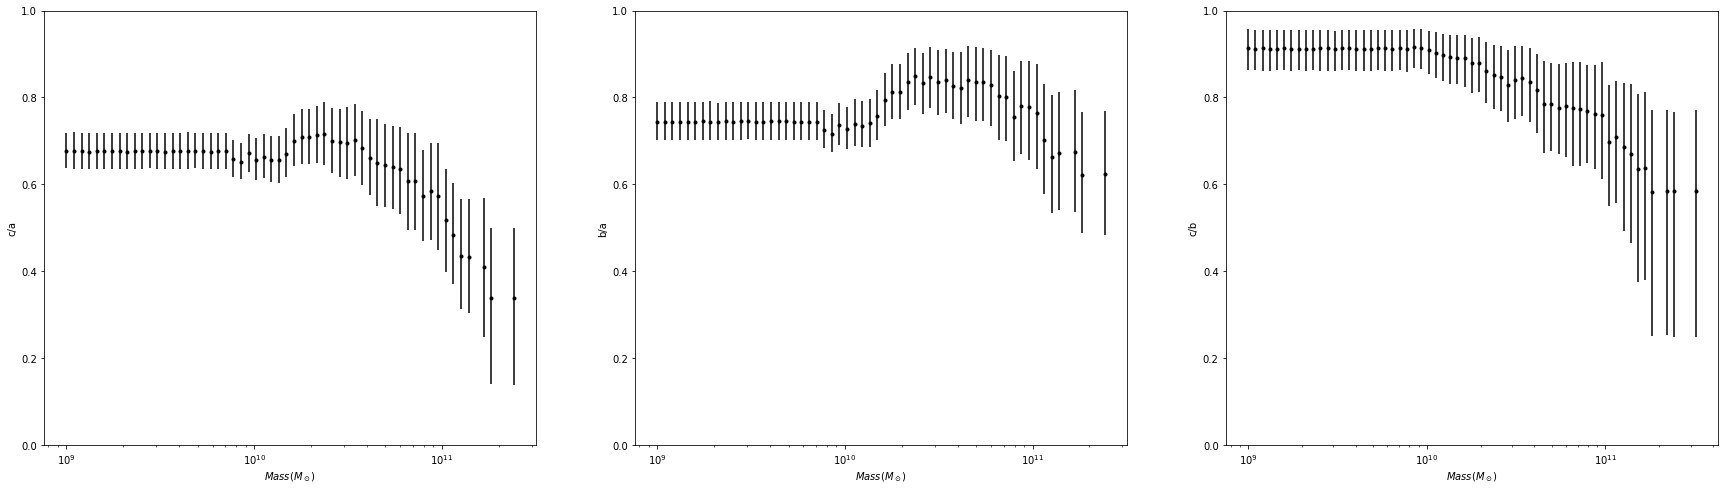

In [47]:
#406862
a = np.array(a_values)
b = np.array(b_values)
c = np.array(c_values)
ca = np.array(ca_values)
ca = ca[ca[:,1] >= 10**-5]
ba = np.array(ba_values)
ba = ba[ba[:,1] >= 10**-5]
cb = np.array(cb_values)
cb = cb[cb[:,1] >= 10**-5]
%matplotlib inline
fig, ax = plt.subplots(1,3,figsize=(30,8))
ax[0].errorbar(ca[:,0],ca[:,1],yerr=ca[:, 2:].T, fmt='.k')
ax[0].set_xlabel(r'$Mass (M_\odot)$')
ax[0].set_ylabel('c/a')
ax[0].set_ylim(0.0,1.0)
ax[0].set_xscale('log')
ax[1].errorbar(ba[:,0],ba[:,1],yerr=ba[:, 2:].T, fmt='.k')
ax[1].set_xlabel(r'$Mass (M_\odot)$')
ax[1].set_ylabel('b/a')
ax[1].set_xscale('log')
ax[1].set_ylim(0.0,1.0)
ax[2].errorbar(cb[:,0],cb[:,1],yerr=cb[:, 2:].T, fmt='.k')
ax[2].set_xlabel(r'$Mass (M_\odot)$')
ax[2].set_ylabel('c/b')
ax[2].set_ylim(0.0,1.0)
ax[2].set_xscale('log')

RANDOM TESTING

In [75]:
halo_data = np.array([x,y,z]).T
test = bootstrap(halo_data)
x2, y2, z2 = test[:,0], test[:,1], test[:,2]
get_axes(x2,y2,z2)

(2.7087032418394372, 0.9485993656074126, 1.257131973348751)

In [112]:
set(name)

{46114.0,
 46115.0,
 46116.0,
 73365.0,
 91207.0,
 118057.0,
 145286.0,
 145287.0,
 167510.0,
 167511.0,
 167512.0,
 167513.0,
 206928.0,
 206929.0,
 206930.0,
 206931.0,
 250374.0,
 275633.0,
 275634.0,
 275635.0,
 275636.0,
 335846.0,
 335847.0,
 363244.0,
 384729.0,
 406861.0,
 406862.0,
 406863.0,
 406864.0,
 455011.0,
 455012.0,
 455013.0,
 480875.0,
 504143.0,
 528161.0,
 528162.0,
 553785.0,
 553786.0,
 580978.0,
 580979.0,
 612244.0,
 612245.0,
 612246.0,
 612247.0,
 644539.0,
 644540.0,
 644541.0,
 644542.0,
 644543.0}

In [7]:
name, m, r, x_pos, y_pos, z_pos = np.loadtxt("Chinchilla_L125_e1.dat",usecols=(0,3,4,8,9,10)).T
def plot_subhalos(index, minmass=0):
    mask = np.logical_and((name==index), (m>minmass))
    mvir, rvir, x, y, z = m[mask], r[mask], x_pos[mask], y_pos[mask], z_pos[mask]
    #print(x)
    figure, axes = plt.subplots()
    draw_circle = plt.Circle((x[0], y[0]), rvir[0], fill=False, edgecolor='k')
    axes.add_artist(draw_circle)
    plt.scatter(x[0],y[0],c='k',s=1.5)
    
    for i in range(1, len(x)):
        draw_circle = plt.Circle((x[i], y[i]), rvir[i], fill=False, edgecolor='r')
        axes.add_artist(draw_circle)
        plt.scatter(x[i],y[i],c='k',s=1.5)
        xplotrange = max((x[0]-np.min(x)),(np.max(x)-x[0]))+rvir[0]
        yplotrange = max((y[0]-np.min(y)),(np.max(y)-y[0]))+rvir[0]
        plotrange=max(xplotrange,yplotrange)
        
        axes.set_xlim(x[0]-plotrange, x[0]+plotrange)
        axes.set_ylim(y[0]-plotrange, y[0]+plotrange)
    
    axes.set_aspect(1)

In [127]:
%matplotlib qt
name, m, r, x_pos, y_pos, z_pos = np.loadtxt("Chinchilla_L125_e1.dat",usecols=(0,3,4,8,9,10)).T
def plot_3d(index,minmass=0):
    mask = np.logical_and((name==index), (m>minmass))
    mvir, rvir, x, y, z = m[mask], r[mask], x_pos[mask], y_pos[mask], z_pos[mask]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[1:], y[1:], z[1:], zdir='z', s=rvir[1:]*2500, c='r')
    ax.scatter(x[0], y[0], z[0], zdir='z', s=rvir[0]*2500, c='k')

In [128]:
%matplotlib qt 
plot_3d(612247)

In [129]:
plot_3d(480875)

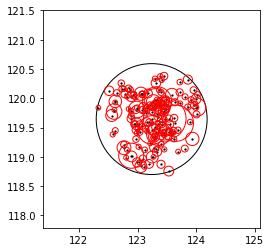

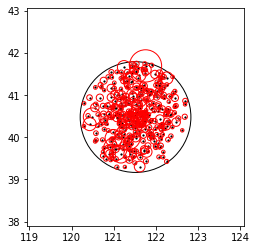

In [8]:
%matplotlib inline
plot_subhalos(612247)
plot_subhalos(480875)

(array([11., 18., 25., 33., 69., 93., 64., 44., 23.,  9.]),
 array([121.692 , 121.9216, 122.1512, 122.3808, 122.6104, 122.84  ,
        123.0696, 123.2992, 123.5288, 123.7584, 123.988 ]),
 <BarContainer object of 10 artists>)

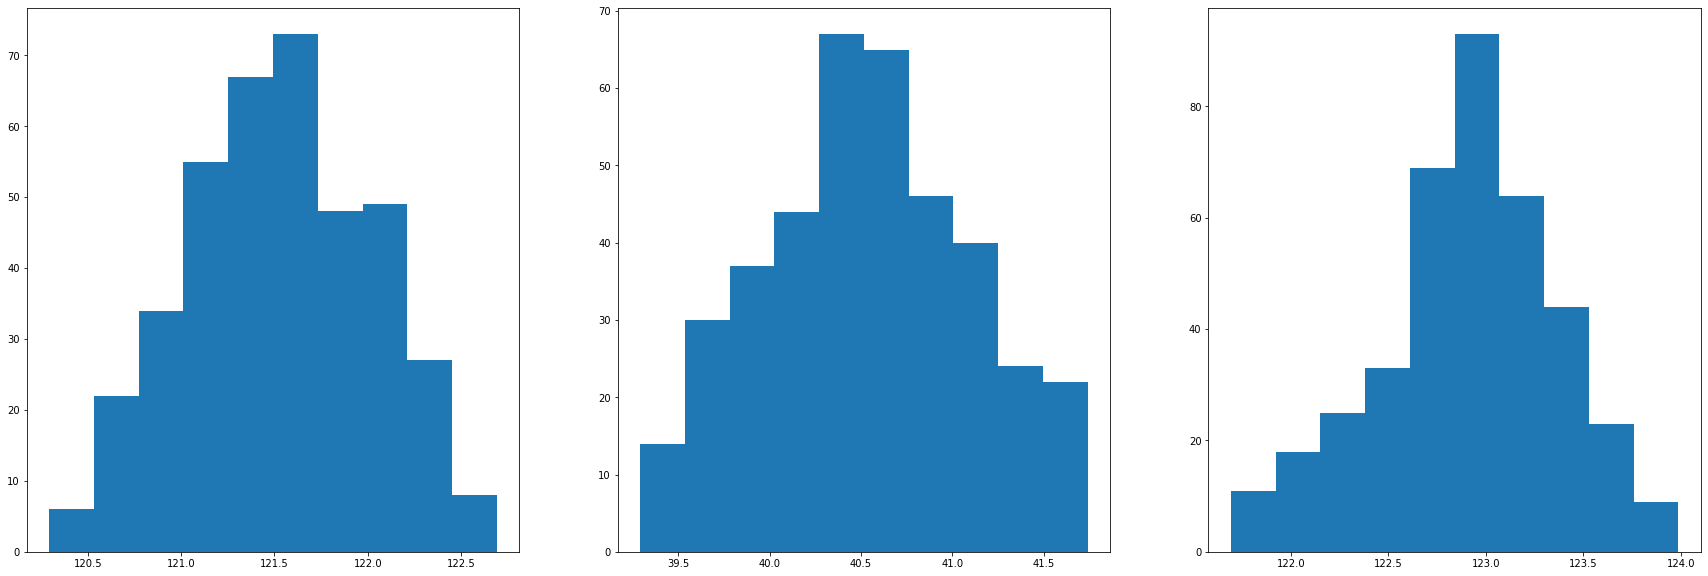

In [131]:
# original data for 480875
mvir, rvir, x, y, z = get_values(480875)
halo_data = np.array([x,y,z]).T

# make histograms of x/y/z for the original dataset
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(x,bins=10)
ax[1].hist(y, bins=10)
ax[2].hist(z, bins=10)

(array([ 7., 10., 18., 19., 25., 23., 25., 22.,  5., 11.]),
 array([72.221 , 72.3826, 72.5442, 72.7058, 72.8674, 73.029 , 73.1906,
        73.3522, 73.5138, 73.6754, 73.837 ]),
 <BarContainer object of 10 artists>)

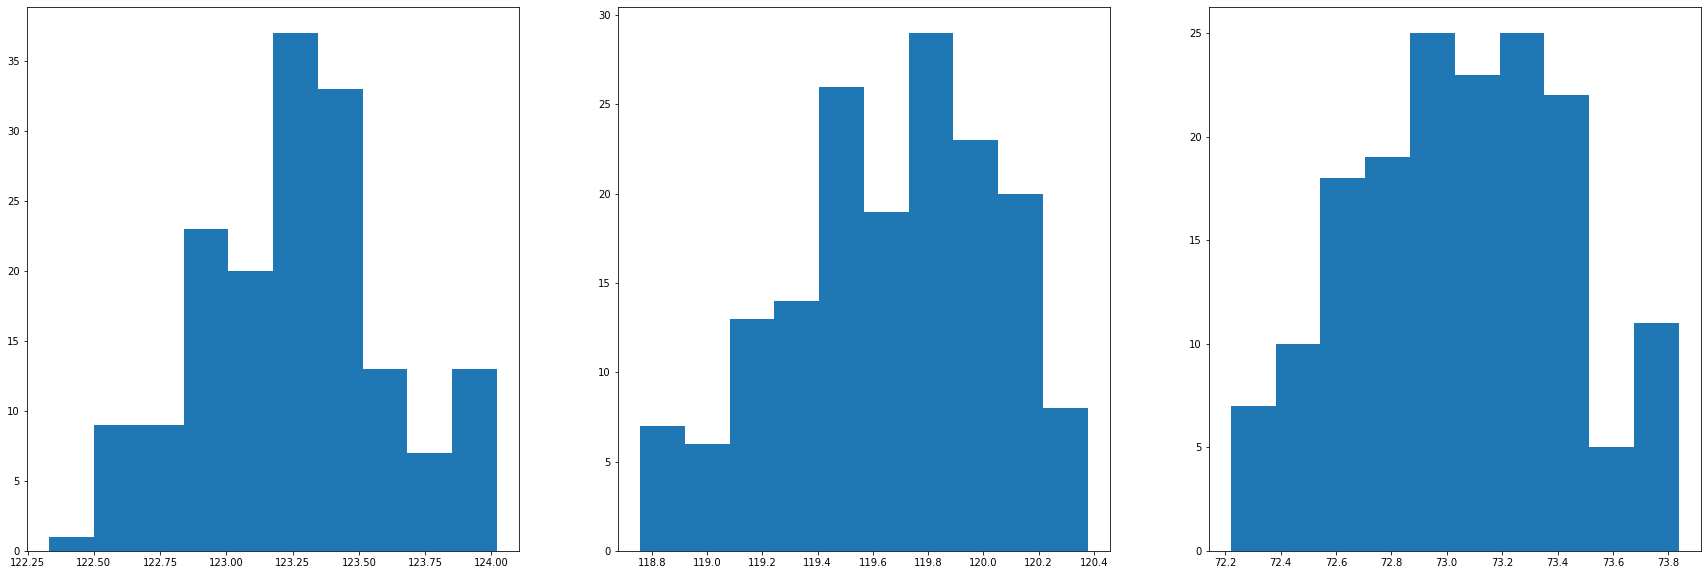

In [132]:
# original data for 480875
mvir, rvir, x, y, z = get_values(612247)
halo_data = np.array([x,y,z]).T

# make histograms of x/y/z for the original dataset
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(x,bins=10)
ax[1].hist(y, bins=10)
ax[2].hist(z, bins=10)

In [227]:
axes = []
for i in set(name):
    if int(i) != 145287 and int(i) != 580979:
        # print(i)
        mvir, rvir, x, y, z = get_values(int(i))
        axes.append(get_axes(x,y,z))
axes = np.array(axes)

Text(0.5, 1.0, 'b')

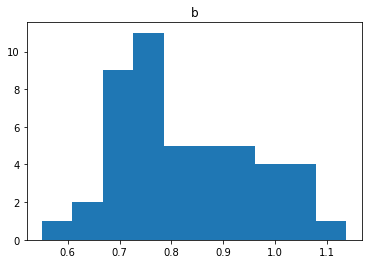

In [234]:
plt.hist(axes[:,1])
plt.title('b')

Text(0.5, 1.0, 'b/a')

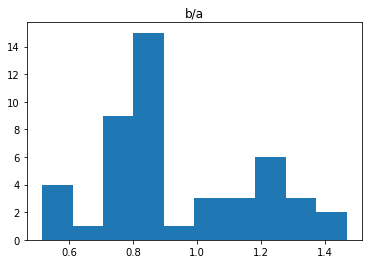

In [149]:
plt.hist(axes[:,1]/axes[:,0])
plt.title('b/a')

Text(0.5, 1.0, 'c/a')

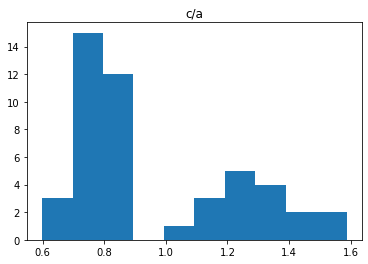

In [150]:
plt.hist(axes[:,2]/axes[:,0])
plt.title('c/a')

Text(0.5, 1.0, 'c/b')

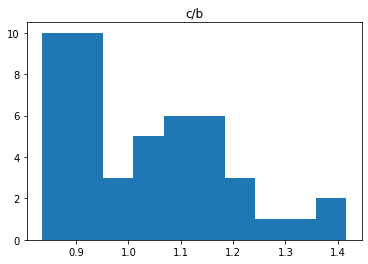

In [151]:
plt.hist(axes[:,2]/axes[:,1])
plt.title('c/b')

In [235]:
axes = []
for i in set(name):
    if int(i) != 145287 and int(i) != 580979:
        # print(i)
        mvir, rvir, x, y, z = get_values(int(i))
        newdata = bootstrap(np.array([x,y,z]).T)
        x,y,z = newdata[:,0],newdata[:,1],newdata[:,2]
        axes.append(get_axes(x,y,z))
axes = np.array(axes)

Text(0.5, 1.0, 'b')

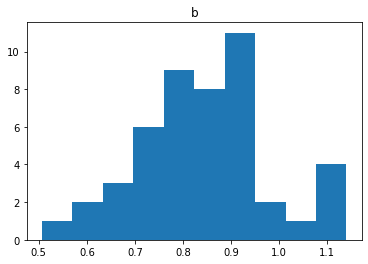

In [236]:
plt.hist(axes[:,1])
plt.title('b')

Text(0.5, 1.0, 'b/a')

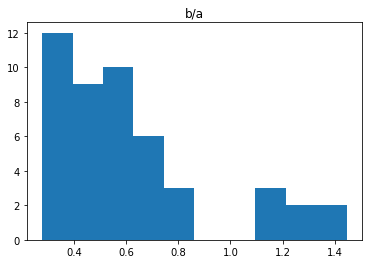

In [184]:
plt.hist(axes[:,1]/axes[:,0])
plt.title('b/a')